# Introduction to Machine Learning and the Basics of Regression
--------------
```
Authors: Will Raymond, Zachary Fox, Brian Munsky
```
<details>
  <summary>Copyright info</summary>

```
Copyright 2023 Brian Munsky

Redistribution and use in source and binary forms, with or without modification, are permitted provided that the following conditions are met:

1. Redistributions of source code must retain the above copyright notice, this list of conditions and the following disclaimer.

2. Redistributions in binary form must reproduce the above copyright notice, this list of conditions and the following disclaimer in the documentation and/or other materials provided with the distribution.

3. Neither the name of the copyright holder nor the names of its contributors may be used to endorse or promote products derived from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.
```
<details>


Package imports

In [1]:

import numpy as np                  #numpy - array managment
from sklearn import datasets        #scikit-learn basic regressors and classifiers and ML metrics
import matplotlib.pyplot as plt     #matplotlib for plotting
from sklearn.metrics import r2_score

## Learning Objectives

* Understand **what** are **Regression**,  **Classification**, and **Machine Learning**, and **when**/**why** to use these.
* Explore and practice at an introductory level the basics of machine learning by completing the following:
  * Learn the theory behind linear regression
  * Write our own codes to perform a linear regression
  * Perform regularized linear regression
  * Try out some advanced machine learning tools for regression and classification

Some relevant books (with available PDFs):
* [Pattern Recognition and Machine Learning](https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf), Christopher Bishop

* [Probabilistic Machine Learning](https://probml.github.io/pml-book/book1.html), Kevin Patrick Murphy

* [Data Modeling for the Sciences: Applications, Basics, Computations](https://www.amazon.com/Data-Modeling-Sciences-Applications-Computations/dp/1009098500/ref=sr_1_1?crid=3ACTTNI3IZ2SA&keywords=Steve+Presse+book&qid=1685627119&sprefix=steve+presse+boo%2Caps%2C317&sr=8-1), Steve Pressé and Ioannis Sgouralis.

# (1) Machine Learning Overview

In this notebook and lecture, we are going to look at some supervised machine learning basics. Let's start off with a definition:

Machine learning (ML) is a class of mathematics and algorithms that learn an arbitrary model (denoted as $\mathcal{M}$) from sample data (denoted as $\bar{X}$) in order to make some predicitons or decisions (denoted as $\bar{Y}$). ML models are usually found by minimizing a given loss function ($L$), which in many cases is related to maximizing some likelihood function. 

Sample data can be provided with or without explanatory labels, and the model to be learned is not explicitly programmed, hence the name "Machine Learning." Broadly, ML falls under the umbrella of Artificial Intelligence, although that field has other disciplines besides ML. 


<p align="center">  <img src="Figures/ml_venn.png" width=70%> </p>

In biomedical engineering, machine learning techniques are applied to analyze and interpret large datasets of biological and medical information, such as genetic data, medical images, or clinical records, to discover patterns, identify relationships, and assist in diagnosis, prognosis, and treatment planning.

There are lots of different types of Machine Learning, each with its own strengths and limitations.  We will only cover a few in this course, but I hope that you will explore more on your own.

## Questions for the class: 

* What are some models you use everyday? 
* Who has used machine learning 
* who has made their own ML model and for what purpose?



<details>
<img src="Figures/chatgpt1.PNG">
</details>

## What are models, anyway?



### A generalized machine learning equation (X -> M -> Y)

In much of machine learning, we are faced with the challenge to  approximate some relationship:
$$\mathbf{X} \rightarrow \mathcal{M} \rightarrow \mathbf{Y}, $$
but you might wonder, what are these quantities $\mathbf{X}$, $\mathcal{M}$, and $\mathbf{Y}$?  That is a great question, because the real power of machine learning is that all three of these terms can mean a very large number of very different things for different problems, and yet the concepts and approaches to solve this problem can remain similar.  Let's define each in very general terms.

<p align="center">   <img src="FiguresD/image3A.png" alt="diabetes progression dataset explaination slide"> </p>

### "Input Features" ($\mathbf{X}$).

The matrix $\bar{X}_i$ is your **input feature data**; this is a collection of data that you can obtain to quantify each particular $i^{\rm th}$ sample, event or experiment. This can take many shapes, forms and sizes. One of the most common is an unordered vector of some arbitrary features. For example, one could imagine a classifier algorithm that takes inputs about a patient's current symptoms and demographics (perhaps we want to predict a probability that this patient has diabetes or another disease). That input data may be formatted as such:

\begin{equation}
  \bar{X} = [ \text{Int : Age}, \text{Int : Urinations per day},  \text{Float : Liters drank per day}, \text{Bool : Peripheral Numbness}]
\end{equation}

An example entry for the $i^{\rm th}$ patient may be:
\begin{equation}
  \bar{X}_i = [ 27, 6, 1.5, True ]
\end{equation}

Note that the inputs could be floats, integers, or booleans all with different units. When we have data on a large number of different samples, we typically order these features into a matrix with one row for each sample:

$$\mathbf{X} =\left[ \begin{matrix} \bar{X}_0 \\ \bar{X}_1 \\ \vdots \\ \bar{X}_{N-1} \end{matrix}\right]$$

Ordered datasets can come in many shapes ranging from something like text (1xN vector where sequence is important) to full 3D color movies (XYZ coordinates by Color channel by number of frames). All of these can be represented by an arbitrary tensor of the correct shape by number of entries in your dataset.

\begin{equation}
  Shape(\mathbf{X}) = Nsamples \times Dim_1 \times Dim_2 ... Dim_N
\end{equation}

**The first step in any machine learning problem is always to look at and understand the data**, so let's do that.


![Diabetese dataset slide](FiguresD/image11A.png)


#### Python example of input matrix for diabetes data set.

In [505]:
#Changing the plotting style 
import matplotlib.pyplot as plt
from cycler import cycler
import matplotlib.cm as cm
from matplotlib.lines import Line2D
colors = [ '#ef476f', '#06d6a0','#7400b8','#073b4c', '#118ab2',]
#colors = ['#fa8174', '#b3de69', '#bc82bd','#ccebc4','#ffed6f','#81b1d2']
font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 12}
plt.rcParams.update({'font.size': 12, 'font.weight':'bold', 'font.family':'sans-serif'  }   )
plt.rcParams.update({'axes.prop_cycle':cycler(color=colors)})
plt.rcParams.update({'axes.prop_cycle':cycler(color=colors)})
plt.rcParams.update({'axes.prop_cycle':cycler(color=colors)})
plt.rcParams.update({'xtick.major.width'   : 2.8 })
plt.rcParams.update({'xtick.labelsize'   : 12 })
plt.rcParams.update({'ytick.major.width'   : 2.8 })
plt.rcParams.update({'ytick.labelsize'   : 12})
plt.rcParams.update({'axes.titleweight'   : 'bold'})
plt.rcParams.update({'axes.titlesize'   : 10})
plt.rcParams.update({'axes.labelweight'   : 'bold'})
plt.rcParams.update({'axes.labelsize'   : 12})
plt.rcParams.update({'axes.linewidth':2.8})
plt.rcParams.update({'axes.labelpad':8})
plt.rcParams.update({'axes.titlepad':10})

The various features in the diabetes data base are: ['age', 'sex', 'bmi', 'bp', 'TC', 'LDL', 'HDL', 'TCH', 'LTG', 'GLU']
The shape of the input matrix is (442, 10)


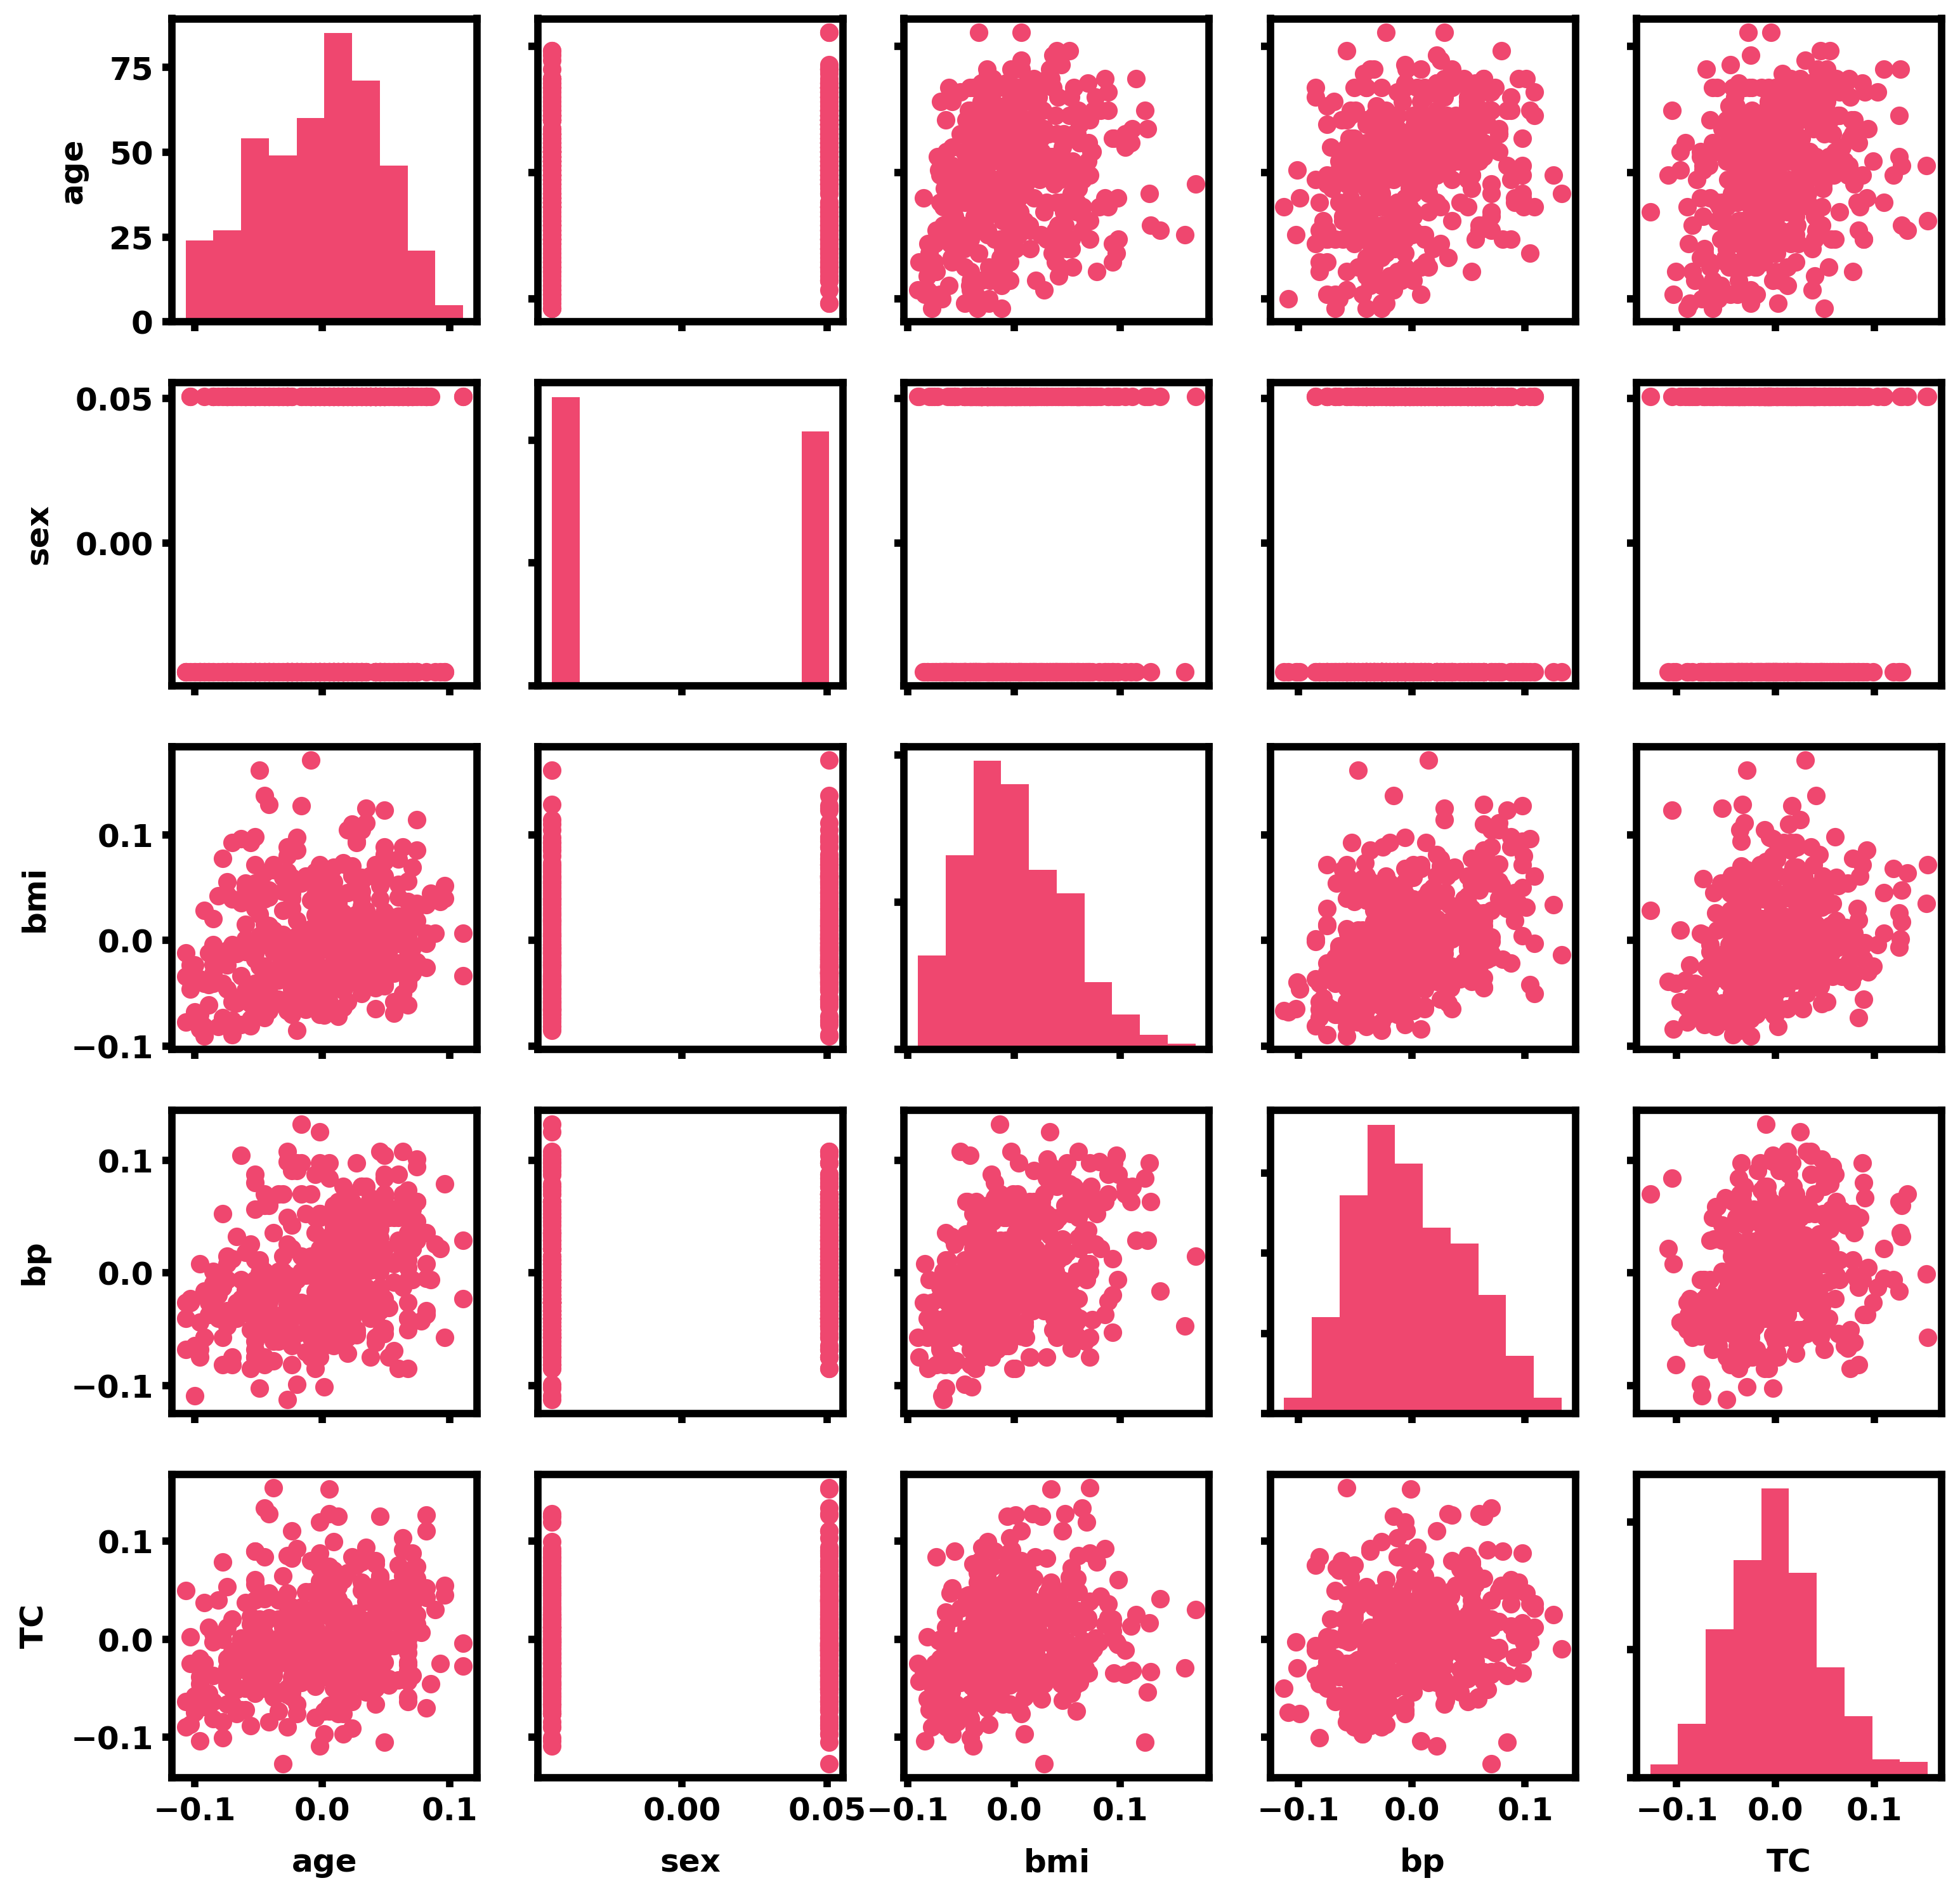

In [506]:
# Example of some input feature data for the diabetes dataset.
diabetes = datasets.load_diabetes()
dataDiabetes = diabetes.data

# Note the following features in the diabetes dataset:
    # age - age in years
    # sex - male or female
    # bmi - body mass index
    # bp - average blood pressure
    # s1 - TC: total serum cholesterol
    # s2 - LDL: low-density lipoproteins
    # s3 - HDL: high-density lipoproteins
    # s4 - TCH: total cholesterol / HDL
    # s5 - LTG: possibly log of serum triglycerides level
    # s6 - GLU: blood sugar level

# Let's update the data labels to be more descriptive.
diabetes.feature_names[4] = 'TC' # Total cholesterol
diabetes.feature_names[5] = 'LDL' # Low-density lipoproteins
diabetes.feature_names[6] = 'HDL' # High-density lipoproteins
diabetes.feature_names[7] = 'TCH' # Total cholesterol / HDL
diabetes.feature_names[8] = 'LTG' # Log of serum triglycerides level
diabetes.feature_names[9] = 'GLU' # Blood sugar level

print(f'The various features in the diabetes data base are: {diabetes.feature_names}')
print(f'The shape of the input matrix is {dataDiabetes.shape}')

# Let's plot the data to see how it looks like.
# We are going to plot a matrix of scatter plots to see how the data looks like.
# We are going to use the first 5 features in the diabetes dataset.
fig, ax = plt.subplots(5, 5, figsize=(12, 12), dpi=300)
for i in range(5):
    for j in range(5):
        if i==j:
            ax[i, j].hist(dataDiabetes[:, i])
        else:
            ax[i, j].scatter(dataDiabetes[:, j], dataDiabetes[:, i])
        if j==0:
            ax[i, j].set_ylabel(diabetes.feature_names[i])
        else:
            ax[i, j].set_ylabel('')
            ax[i, j].set_yticklabels([])
        if i==4:
            ax[i, j].set_xlabel(diabetes.feature_names[j])
        else:
            ax[i, j].set_xlabel('')
            ax[i, j].set_xticklabels([])
plt.show()
# Note that the variables are all scaled somewhat arbitrarilly in this data set.
# Some are discrete (e.g., sex), some are continuous (e.g., age).



-----
### Target Labels ($\mathbf{Y}$)

![alt text](FiguresD/image4A.png)

The vector or matrix $\bar{Y}_i$ is your **target data** or **label data**; this is the end result or classification that you are trying to obtain or predict to describe the sample, event, or experiment. This can too take many shapes, forms, and sizes, and it might not even exist at all.

If the above data has a corresponding label (e.g., a known fact such as a statement saying whether the entries in your data truly have diabetes), your dataset is said to be **labeled**, and you can use **Supervised** machine learning techniques. 

In other machine learning problems, $\bar{Y}_i$ may not be specified. In this case, when your dataset has an absence of labels, then any approaches are said to be **Unsupervised.**

In rarer cases, sometimes **Semi-supervised** approaches may be taken, which exist somewhere between the middle of these two. For example, say if you only have positive labels, or only half your data is labeled correctly. You can take a semi-supervised approach to keep those labels instead of throwing them out and losing that information. 

For now, we will focus on supervised learning, and we will assume that $\bar{Y}_i$ is known.  

#### Python example of Target Vectors for Diabetes data set.

The shape of the target data is (442,)
[151.  75. 141. 206. 135.]
The shape of the target data is (442,)
[1. 0. 1. 1. 0.]


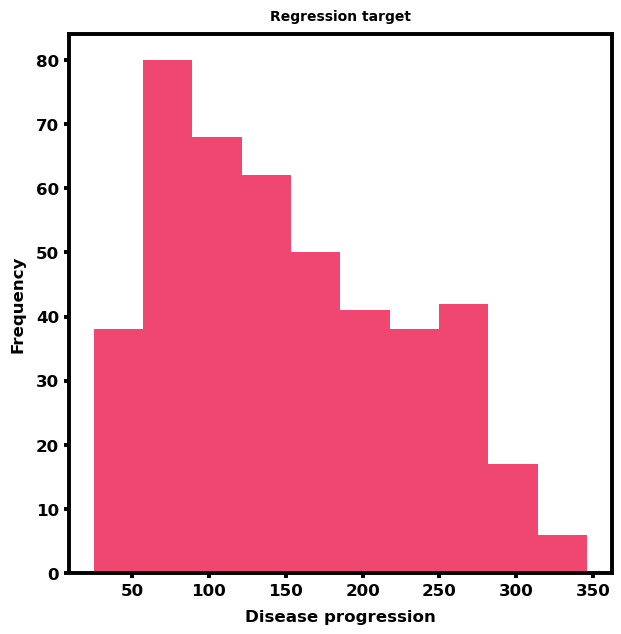

In [508]:
# Load the target data from the diabetes dataset.
# The target data is a quantitative measure of disease progression one year after baseline.
targetDiabetesRegression = diabetes.target
print(f'The shape of the target data is {targetDiabetesRegression.shape}')
print(targetDiabetesRegression[0:5])

# Let's also define a binary target variable for classification, where we 
# only need to classify the disease progression as high or low.
targetDiabClass = np.zeros(targetDiabetesRegression.shape)
targetDiabClass[targetDiabetesRegression > 140] = 1
print(f'The shape of the target data is {targetDiabClass.shape}')
print(targetDiabClass[0:5])

# Let's add the the target data to see how it looks like.
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.hist(targetDiabetesRegression)
ax.set_title('Regression target')
ax.set_xlabel('Disease progression')
ax.set_ylabel('Frequency')
plt.show()


What is this measurement? Well, good question. Citing the original LARS methods paper from 2003:

![](./diabetes_y.PNG)

This is painfully vague! It is likely a change or measure in eAG (estimated average glucose level) which has units of mg/dL. Does anyone know of what is currently measured when you walk in for a blood test and what this dataset could be recreated with?

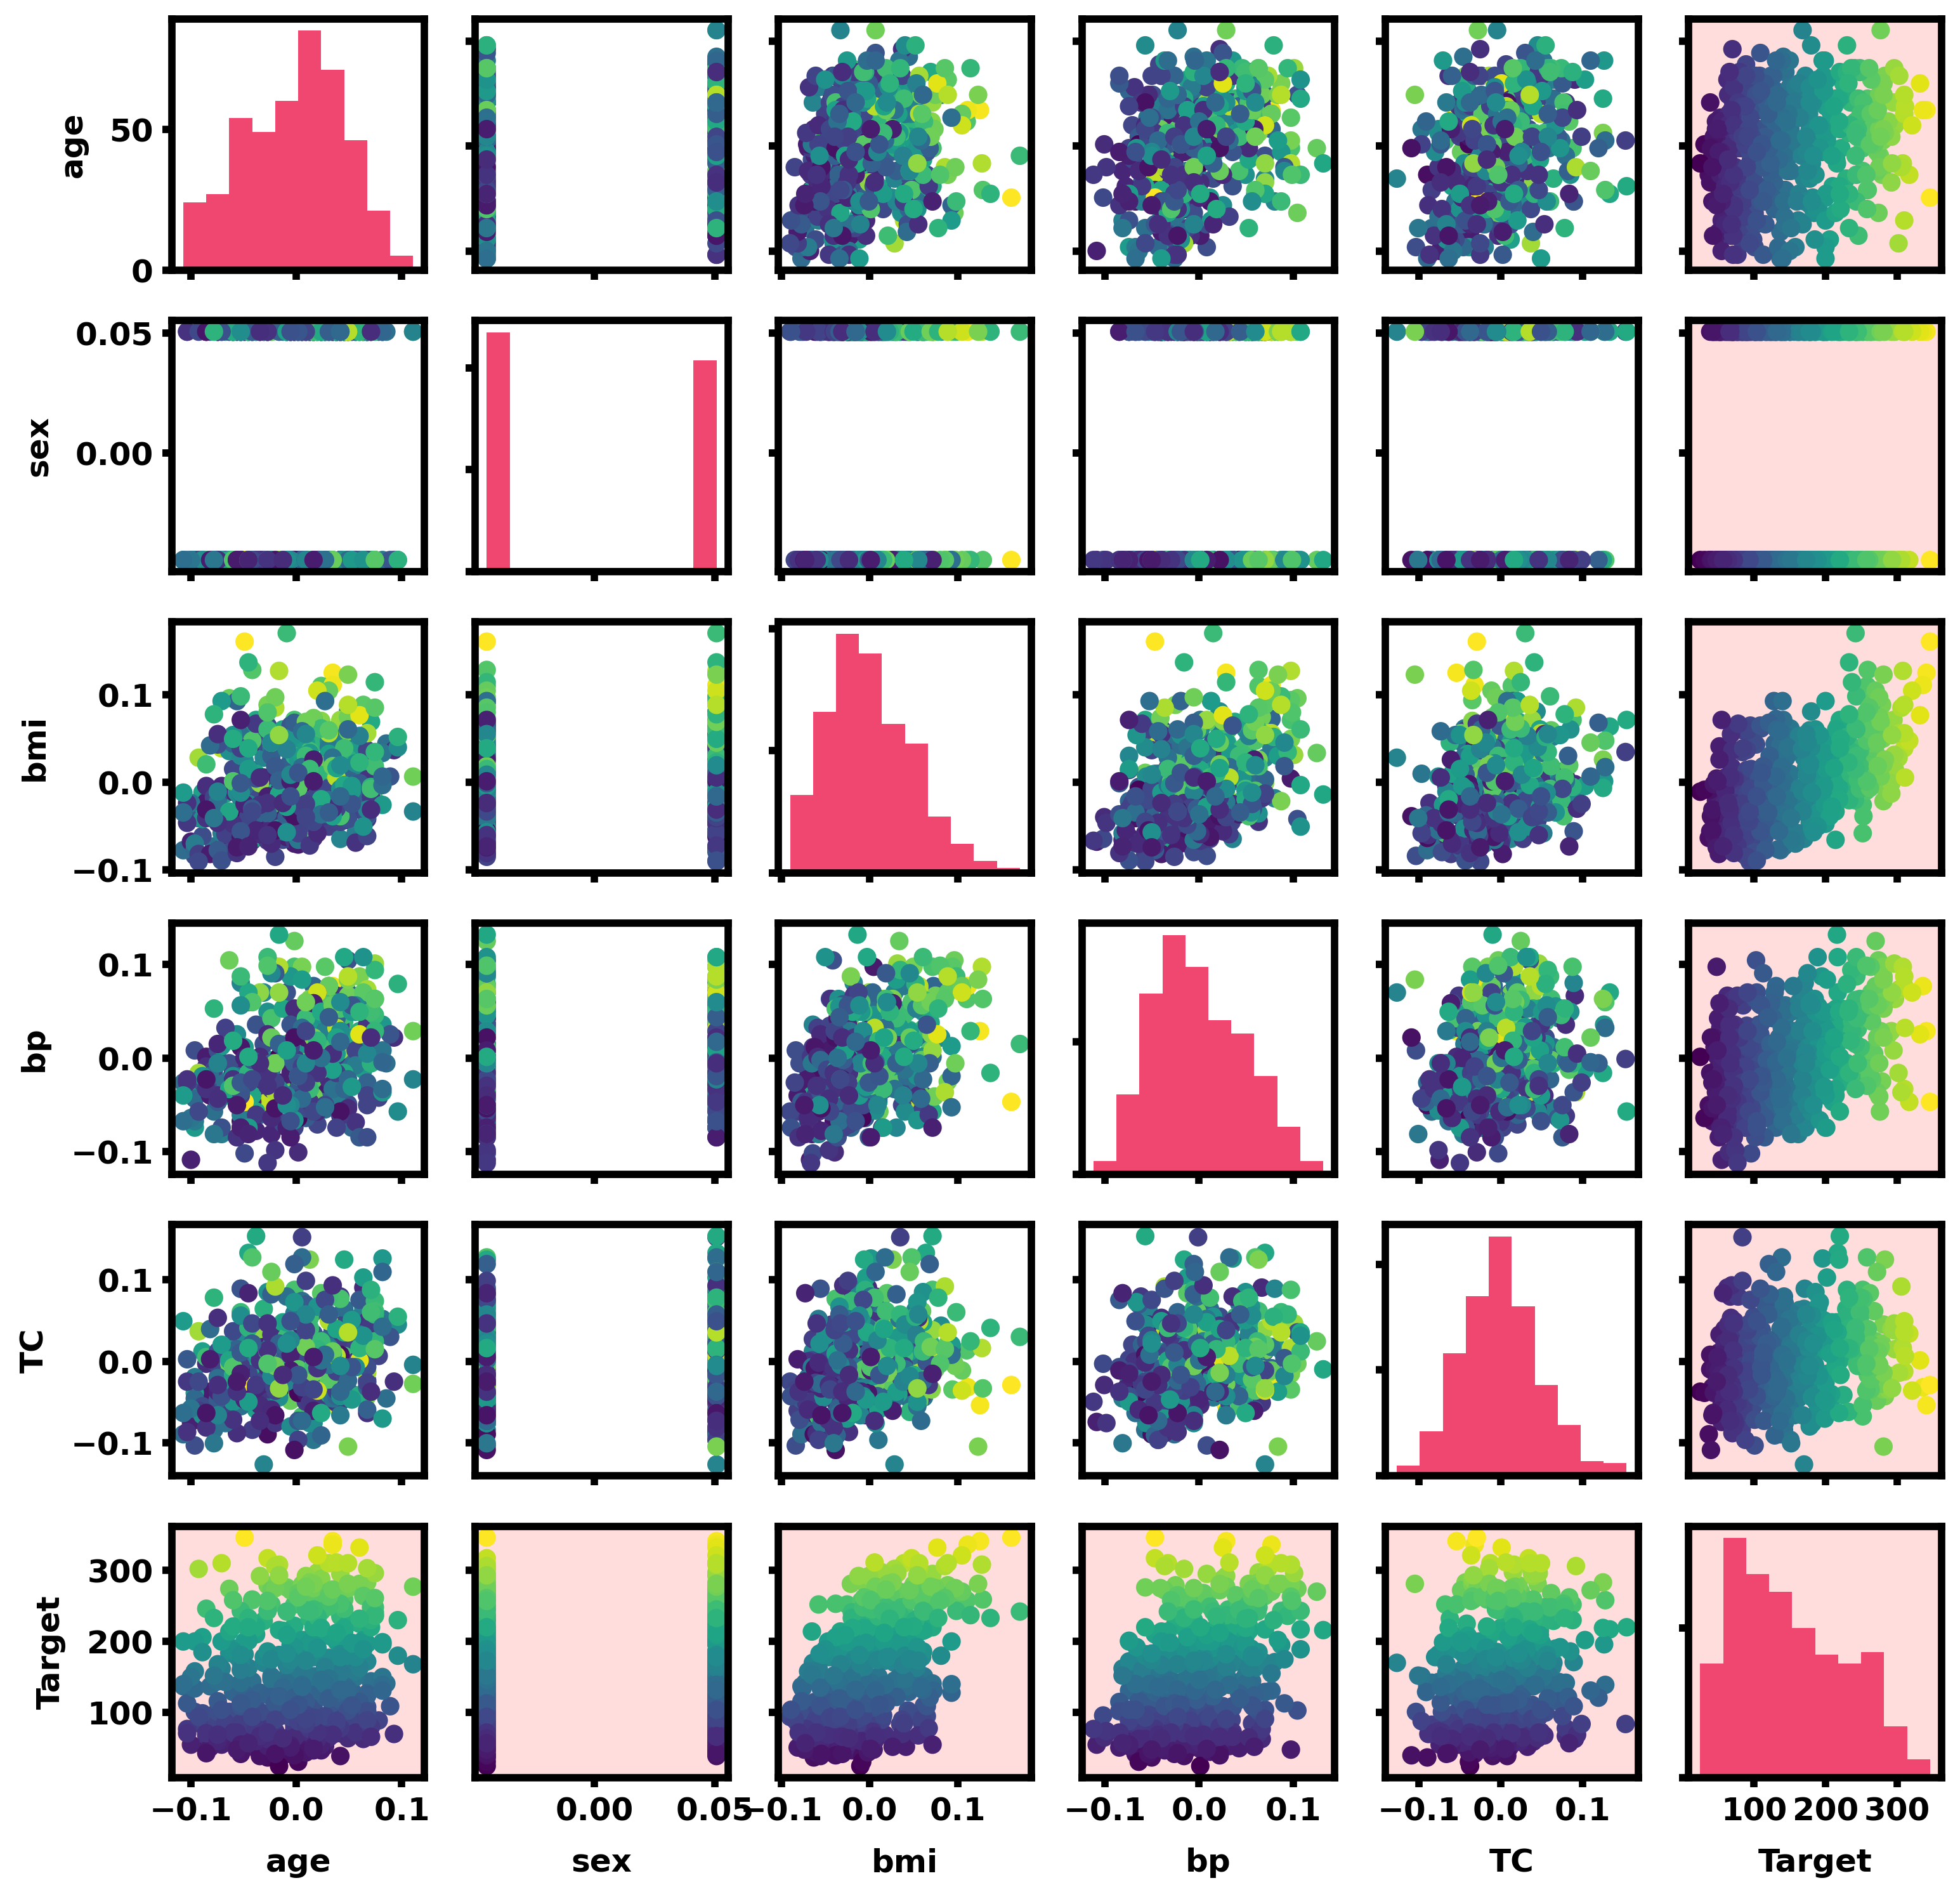

In [509]:
# Let's also replot our features against the target variable to see if we can see any patterns.
# For this, we are going to make a 6 x 6 matrix of scatter plots, with the features in the first 5 rows
# and the target variable in the last row.  We will also color the points according to the target variable.
fig, ax = plt.subplots(6, 6, figsize=(12, 12), dpi=300)
data_and_targets = np.hstack((dataDiabetes[:,:5], targetDiabetesRegression.reshape(-1, 1)))
for i in range(6):
    for j in range(6):
        if i==j:
            ax[i, j].hist(data_and_targets[:, i])
        else:
            ax[i, j].scatter(data_and_targets[:, j], data_and_targets[:, i], c=targetDiabetesRegression)
        if j==0:
            if i==5:
                ax[i, j].set_ylabel('Target')
            else:
                ax[i, j].set_ylabel(diabetes.feature_names[i])
        else:
            ax[i, j].set_ylabel('')
            ax[i, j].set_yticklabels([])
            if i==5:
                ax[i, j].set_facecolor('#FFDDDD')
        if i==5:
            ax[i, j].set_facecolor('#FFDDDD')
            if j==5:
                ax[i, j].set_xlabel('Target')
            else:
                ax[i, j].set_xlabel(diabetes.feature_names[j])
        else:
            ax[i, j].set_xlabel('')
            ax[i, j].set_xticklabels([])
            if j==5:
                ax[i, j].set_facecolor('#FFDDDD')

# Can you see any patterns in the data?  What do you think would be the best features to use for prediction?
# How would you turn code this inot a callable function for later use?
# How could you change the color scheme to make to use the binary target variable for a different visualization?

-----
### The Model ($\mathcal{M}$)
![alt text](FiguresD/image5A.png)

$\mathcal{M}$ in our definition is any arbitrary set of mathematical or logical operations that takes $\bar{X}_i$ as an input and then makes a guess for a corresponding $\bar{Y}_i$. 

There are **tons** of different models and algorithms used for fitting data, and we will try a few over the next couple lessons, but this is **extremely** general, and statisticians and computer scientists are developing new models every day!

### Regression and Classification
The two most common superivsed learning tasks are **Regression** and **Classification**.  The difference comes from what kinds of targets we are trying to predict. When targets ($\bar{Y}$) are defined in advance and they take on continuous values (e.g., 2.345), we call this a **Regression** problem. When the targets take on discrete values (e.g., \{0,1,2\} or \{true,false\}, or \{cat, horse, dog\}), we call this a **Classification** problem.



-----
### Regression
![alt text](Figures/regression.png)

When the desired output is a continuous valued, then we are training a model to perform a regression. An example problem would be taking a dataset of house features $\bar{X}$ and their current market prices $\bar{Y}$ and training a model to produce predicted prices for other houses, $\tilde{Y} =  \mathcal{M}(\tilde{X})$.

To evealuate how good is our model, we typically employ a **loss function**, which is simply a function that takes the real targets $\bar{Y}_i$ and the predicted targets $\tilde{Y}_i$ and quantifies their difference. 

An appropriate *loss function* for this situation may be the mean squared error (MSE) for your predicted prices and the true prices (we will clarify why this choice in a little bit when we return to the concept of likelihood functions):

\begin{align}
MSE &= \frac{1}{N}\sum_{i=0}^{N-1} (\tilde{Y}_i - \bar{Y}_i)^2\\
 &= \frac{1}{N}\sum_{i=0}^{N-1} (\mathcal{M}(\tilde{X}_i) - \bar{Y}_i)^2\\
\end{align}

The goal is to find a the best possible $\mathcal{M}$ to minimize this loss function.

-----
### Classification
![alt text](Figures/classification2.png)

$\bar{Y}$ is our target for our ML model to learn. If our input data label $Y$ is a set of discrete or boolean labels, then we are setting up a model to solve a classification problem. For example, training a classifier to tell if a picture contains a cat or a dog, our dataset would look like $\bar{X}$ of shape $[N, X,Y, RGB]$ and $Y$ our labels would be shape $[N]$ with labels 0 for a cat or 1 for a dog (or vice versa). Comparing true labels $Y$ with predicted labels $\bar{Y}$ is our model's loss function:

\begin{equation}
  \bar{L} = F(Y, \bar{Y})
\end{equation}

An appropriate selection for **loss function** in this classification problem would be binary cross entropy:

\begin{equation}
  -\frac{1}{N} \sum_{i=1}^N Y_i*\log(p(Y_i)) + (1-Y_i)*\log(1-p(Y_i))
\end{equation}

This is very closely related to the log likelihood function for a binomial distribution as we will see later.

C:\TEMP\ipykernel_19280\3522023525.py:1: RuntimeWarning: divide by zero encountered in log
  binary_cross_entropy = lambda p,q: -p*np.log(q) - (1-p)*np.log(1-q)
C:\TEMP\ipykernel_19280\3522023525.py:1: RuntimeWarning: invalid value encountered in multiply
  binary_cross_entropy = lambda p,q: -p*np.log(q) - (1-p)*np.log(1-q)


Text(0.5, 1.0, 'Log loss across predicted values for a true label of 1')

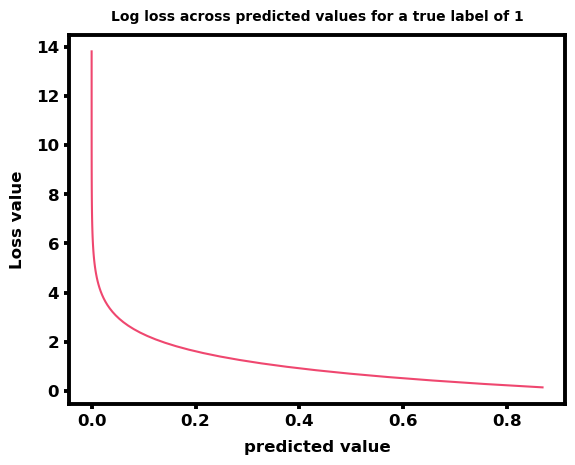

In [529]:
binary_cross_entropy = lambda p,q: -p*np.log(q) - (1-p)*np.log(1-q)
plt.plot(np.logspace(-6, -.001, 100), binary_cross_entropy(1, np.logspace(-6, 0, 100)))
plt.xlabel('predicted value')
plt.ylabel('Loss value')
plt.title('Log loss across predicted values for a true label of 1')

--------
### What characteristics makes for a good model?
Ideally, we want a model to be generalizable to new data. A good model acts as a map to its real world process. A good map doesn't show you every stone and blade of grass along the path, but instead the overarching **generalized** idea.

More generally, a good model in machine learning exhibits several key characteristics that contribute to its effectiveness in solving a given task. 
* **it should demonstrate high predictive accuracy**, meaning it can accurately generalize patterns from the training data to make accurate predictions on unseen data. 
* **it should be robust**, performing well across different datasets and under various conditions, indicating its ability to generalize beyond the training data. 
* **it should be interpretabile**, so stakeholders can understand and trust the model's decisions, especially in sensitive domains. 
* **it should be scalable** to handle large datasets efficiently and to accommodate potential increases in data volume. 
* **it should be computationally efficient,** striking a balance between complexity and performance to enable practical deployment in real-world applications.
* **it should be adaptable** to new data and evolving requirements, enabling iterative refinement and optimization to maintain its relevance and effectiveness over time.

Which of the six models below do you think would be considered a good model?

![alt text](Figures/generalizable1.png)

-------
# (2) Linear regression theory

![alt text](FiguresD/image8.png)

In **Linear Regression** we start with our with $D$ different measured features ($x_1,x_2,\ldots,x_D$), which _we assume_ are linearly related to the target variable ($y$). To express this mathematically, we define a function which multiplies each feature $x_i$ with a corresponding, unknown weight $w_i$, and add them all together:
$$
y = \mathcal{M}(\mathbf{x}) = w_0 x_0 + w_1 x_1 + ... + w_D x_D.
$$
We can write this using vector notation as:
$$
y = \mathbf{w}^{\rm T} \mathbf{x}.
$$

## Linear function with matrix multiplication

When we have the multiple data sample sets of $\mathbf{x}$ and $y$, given by $\{(\mathbf{x}_1,y_1),(\mathbf{x}_2,y_2),\ldots,(\mathbf{x}_N,y_N)\}$ we can construct a matrix, in which each row is defined by the corresponding $\mathbf{x}_k$.

$$
\mathbf{X}=\begin{bmatrix}
\mathbf{x}_1^T \\
\mathbf{x}_2^T \\
\vdots \\
\mathbf{x}_N^T
\end{bmatrix}
$$

We want to apply the _same weights_ $\mathbf{w}$ to each example and return a predicted value, $y_k$.  This can be achieved through a matrix multiplication:
$$
\mathbf{y} = \mathbf{w}^T \mathbf{X}^T = \mathbf{X}\mathbf{w}
$$

For **real models** and **real data**, this equality is never going to be exact.  Instead, we are going tohave to allow some variations to account for noise or errors in our measurements.

## Loss Function for Linear Regression

So how do we quantify how good is this linear model in comparision to real, noisy data?

For this, we want to define what is called the **loss function**, which is a fundamental concept in ML. The loss function is a function which:
   * when we take the derivative (or approximate derivative) of it, this can be used to update the weights of the model.
   * compares the predicted values of our model to ground truth values (supervised learning) OR takes some metric of the predicted values (unsupervised learning).
    
Constructing the loss function is a **design choice**. How we choose it can drastically affect the quality of our ML model.

## Likelihood Approach

Whenever possible, most statisticians prefer to define loss functions in terms of **likelihood functions**, since we want our model to be as good as possible in explaining our data in a statistically rigorous sense. We don't have time to go step by step through the derivation, but its extremely illustrative to do it on your own time!

<details>
  <summary>Derivation</summary>
  
Because we are engineers and quantitative biologists, let's assume that the our noisy measurements data are given by our beautiful linear function, plus some real-world noise term $\epsilon$,
$$
t_i \equiv y^{\rm (measured)}_i = y_i + \varepsilon = \mathbf{x}_i\mathbf{w} + \varepsilon_i
$$
where each $\varepsilon_i$ is an **independent** random number drawn from a normal distribution with mean 0 and variance $\sigma^2$.

Therefore, we can write the likelihood function of the true value given the model prediction for any input $\mathbf{x}$:

$$
L(t_i | \mathbf{x}_i, \mathbf{w}, \sigma^2 ) = \mathcal{N}(t_i|\mathbf{x}_i\mathbf{w},\sigma^2)
$$

and for all of our *independent* samples as
$$
L(\mathbf{t} | \mathbf{X}, \mathbf{w}, \sigma^2 ) = \prod_{i=1}^N \mathcal{N}(t_i|\mathbf{x}_i\mathbf{w},\sigma^2)
$$

**Question:** What assumption did we make here?  When would using the above equation be a bad idea in practice?

### Transforming to the Log-Likelihood
When we have many data points, the probability to observe them all is going to be very small, even if we have an excelent model. Therefore, it is much more convenient for us to work with log-likelihood functions.
$$
\log L(\mathbf{t}| \mathbf{X}, \mathbf{w}, \sigma^2 ) = \sum_{i=1}^N \log \mathcal{N}(t_i|\mathbf{x}_i\mathbf{w},\sigma^2) =  \sum_{i=1}^N \log \left(\frac{1}{\sqrt{2\pi \sigma^2)}}\exp\left(\frac{(t_i-\mathbf{x}_i\mathbf{w})^2}{2\sigma^2}\right) \right)
$$
$$
\log L(\mathbf{t} | \mathbf{X}, \mathbf{w}, \sigma^2 ) = - N \log \sigma^2 -  \frac{N}{2} \log 2 \pi - \frac{1}{2\sigma^2}  \sum_{i=1}^N \big( t_i-\mathbf{x}_i\mathbf{w} \big)^2
$$

## Differentiating to find the Maximum Likelihood Estimate
Our goal is to find the model weights that **maximize** this log-likelihood function.  And, as we have seen multiple times already, this is done by taking derivatives:
$$ \nabla_{\mathbf{w}}\log L(\mathbf{t} | \mathbf{X}, \mathbf{w}, \sigma^2 ) =    \nabla_{\mathbf{w}}\left(  \frac{1}{2\sigma^2}  \sum_{i=1}^N \left( t_i-\mathbf{w}^T\mathbf{x}_i^T \right)^2\right)$$
$$=  \frac{1}{\sigma^2}  \sum_{i=1}^N \left(t_i-\mathbf{w}^T\mathbf{x}_i^T\right)\mathbf{x}_i.$$

Setting this to zero at the maximum likelihood estimate (MLE) and moving the $t_i$ terms to the other  side, we can derive:
$$  \sum_{i=1}^N \left(\mathbf{w}_{\rm MLE}^T\mathbf{x}_i^T\right)\mathbf{x}_i =  \sum_{i=1}^N  t_i\mathbf{x}_i$$

We can then simplify in matrix notation as:
$$\mathbf{w}_{\rm MLE}^T\mathbf{X}^T\mathbf{X} =   \mathbf{t}^T\mathbf{X}^T $$
and by taking the transpose of both sides:
$$ \mathbf{X}^T\mathbf{X} \mathbf{w}_{\rm MLE} =   \mathbf{X} ^T \mathbf{t}$$
which reduces to:
$$\mathbf{w}_{\rm MLE} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{t} $$

In this last expression, the term $(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T$, which is often denoted as $\mathbf{X}^{+}$ is known as the *Moore-Penrose Pseudo-Inverse* of the matrix $\mathbf{X}$.  This is a generalization of the common matrix inverse ($\mathbf{X}^{-1})$, but the Moore-Penrose Pseudo-Inverse works for tall matrices (matrices with more rows than there are columns).  When $\mathbf{X}$ is invertible, then $\mathbf{X}^{+}=\mathbf{X}^{-1}$, but that will rarely be the case in a realistics regression problem where there will be far more rows than columns in the matrix $\mathbf{X}$.

So, after that hard work of maximum likelihood estimation, we arrived at a very intuitive result.  If we have a bunch of observations in the feature matrix $\mathbf{X}$ we can make the MLE predction for the noisy target vector $\mathbf{t} = \mathbf{y}^{\rm (measured)} = \mathbf{y}+\bf{\varepsilon}$ the equation:
$$\mathbf{t} = \mathbf{Xw}_{\rm MLE},$$
where the MLE weights are simply:
$$\mathbf{w} = \mathbf{X}^{+}\mathbf{t}.$$


</details>

TL;DR: The maximum likelihood weights are found by the inverse (Moore-penrose pseudoinverse here) of the feature matrix $\mathbf{X}$ multiplied by the target vector.

 $$\mathbf{w}_{\rm MLE} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{t} $$



# (3) Python Example for Linear Regression

Now, let's use the [diabetes dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes) to try a linear regression:

In [534]:
# Load the input data and target data from the diabetes dataset.
dataMatrix, targetVector = datasets.load_diabetes(return_X_y=True)

# How can we compute the number of features and number of data points?
numSamples, numFeatures = dataMatrix.shape

print(f'The number of samples is {numSamples}')
print(f'The number of features is {numFeatures}')

The number of samples is 442
The number of features is 10


In [535]:
# Let's start by splitting the data into a training and testing set.
# We will use 80% of the data for training and 20% for testing.
# Partition the data into training and test sets, using random selection.
np.random.seed(0)
indices = np.random.permutation(numSamples)
splitIndex = int(numSamples*0.8)
training_inds, test_inds = indices[:splitIndex], indices[splitIndex:]
trainingData, testData = dataMatrix[training_inds,:], dataMatrix[test_inds,:]
trainingTarget, testTarget = targetVector[training_inds], targetVector[test_inds]

# Now, let's find the weights according to our derived expression
weights = np.linalg.inv(trainingData.T @ trainingData) @ trainingData.T @ trainingTarget

In [7]:
# Use the weights to predict the target data.
predTargetCustom = testData @ weights

In [ ]:
# Plot the true target data and the predicted target data.
f,ax = plt.subplots(figsize=(4,3))
ax.scatter(testTarget, predTargetCustom)
ax.set_xlabel('true value'); ax.set_ylabel('predicted value')
ax.set_title('True vs predicted target data')
#Put a line through the origin with slope 1
ax.plot(ax.get_xlim(), ax.get_xlim(), 'k--')
plt.show()

# Hmmm,  This doesn't look so good.  
# Let's compute the R^2 score to quantify the fit.
# The R^2 score, also known as the coefficient of determination, is a measure of how well the
# observed outcomes are replicated by the model.  It is a number less than 1, with 1 indicating
# perfect fit. 
r2 = r2_score(testTarget, predTargetCustom)
print(f'The R^2 score is {r2}')
# Yuck, negative values can indicate that the model is worse than just using the mean of the target data!


In [537]:
# Let's see if we can do better by adding a bias term to the model.
# We can add a bias term by adding a column of ones to the input data matrix.
# This is equivalent to adding a constant to the input data.
X_biasTrain = np.hstack((trainingData, np.ones((trainingData.shape[0], 1))))
X_biasTest = np.hstack((testData, np.ones((testData.shape[0], 1))))

# find the weights according to our derived expression
w_bias = np.linalg.inv(X_biasTrain.T @ X_biasTrain) @ X_biasTrain.T @ trainingTarget
y_biasPredict = X_biasTest @ w_bias

In [ ]:
# Now, let's plot the true target data and the predicted target data.
f,ax = plt.subplots(figsize=(4,3))
ax.scatter(testTarget, y_biasPredict)
ax.set_xlabel('true value'); ax.set_ylabel('predicted value (with bias)')
ax.set_title('True vs predicted target data')
#Put a line through the origin with slope 1
ax.plot(ax.get_xlim(), ax.get_xlim(), 'k--')
plt.show()

# Now, let's compute the R^2 score to quantify the fit.
r2 = r2_score(testTarget, y_biasPredict)
print(f'The R^2 score is {r2}')

# That's better!  The R^2 score is now positive, indicating that the 
# model is better than just using the mean of the target data.


## Regularization

![alt text](Figures/generalizable2.png)

Sometimes, we don't want the weights of a model to be unrealistically large, as this can lead to unnecessary overfitting. To avoid this, we can assume a **prior** on the expected values of the parameters, which will penalize unexpected large values of the weights (we will learn more about priors in Bayesian estimation later in the course). By using an independent Gaussian prior with mean zero and variance $\sqrt{2/\lambda}$ on every weight, we are saying that we expect each parameter $w_id$ to be zero unless that parameter is truly needed to match the data. 

With this addition, the loss function becomes:
$$
\mathcal{L}_{\rm ridge}(\mathbf{X},\mathbf{w},\lambda) = C + \frac{1}{N} \sum_{i=1}^N \big( t_i-\mathbf{x}_i\mathbf{w} \big)^2 +\lambda \sum_{d=1}^{D+1}  w_d ^2
$$

$$
\mathcal{L}_{\rm ridge}(\mathbf{X},\mathbf{w},\lambda) = C + ( \mathbf{t} - \mathbf{X} \mathbf{w} )^T( \mathbf{t} - \mathbf{X} \mathbf{w} ) +  \lambda \mathbf{w}^T \mathbf{w}
$$

where $C$ is some constant that does not depend on $\mathbf{w}$.

Like before, we can differentiate with respect to $\mathbf{w}$ to find the maximum, and we will find the answer:
$$
\mathbf{w}_{\rm Ridge} = (\mathbf{X}^T \cdot \mathbf{X} + \lambda^2 I)^{-1}\mathbf{X}^T \cdot \mathbf{t}
$$



### Hyperparameters
Before we go on to an example, please note that we have just introduced a new parameter $\lambda$, which is known as the *regularization parameter*.  This is our first example of model *hyperparameter*.

In machine learning, hyperparameters are parameters that are set prior information into the training process or control the behavior of the learning algorithm itself. They are not learned from the training data but are instead specified by the practitioner based on their prior knowledge, experience, or through techniques like grid search or random search.

Hyperparameters affect the learning process indirectly by influencing the model's capacity, complexity, and regularization. Examples of hyperparameters include the regularization parameter in models like ridge regression or support vector machines (as shown here), but also include the learning rate in gradient descent, the depth of a decision tree, the number of hidden layers in a neural network, and so on.

Tuning hyperparameters effectively is crucial for achieving optimal model performance, as different values can lead to vastly different results in terms of predictive accuracy, generalization, and computational efficiency.  This tuning is often done using cross-validation, which is why we split up our data in the beginning of this exercise.  We will see more on this shortly.

In [11]:
# Find the weights (w) according to our derived expression using the ridge regression
lam = np.sqrt(3)  # Set our hyper parameter.  This is a guess for now.

# Compute the weights using the ridge regression formula.
w_ridge = np.linalg.inv(X_biasTrain.T @ X_biasTrain + (lam**2)*np.eye(X_biasTrain.shape[1])) @ X_biasTrain.T @ trainingTarget

# Use the weights to predict the target data.
y_ridgeTest = X_biasTest @ w_ridge

In [ ]:
# Now, let's plot the true target data and the predicted target data.
f,ax = plt.subplots(figsize=(4,3))
ax.scatter(testTarget, y_biasPredict, alpha=0.5, label='linear regression')
ax.scatter(testTarget, y_ridgeTest, alpha=0.5, label='ridge regression')
ax.set_xlabel('true value'); ax.set_ylabel('predicted value')
ax.legend()
ax.set_title('True vs predicted target data')

#Put a line through the origin with slope 1
ax.plot(ax.get_xlim(), ax.get_xlim(), 'k--')
plt.show()

# Now, let's compute the R^2 score to quantify the fit.
r2 = r2_score(testTarget, y_ridgeTest)
print(f'The R^2 score is {r2}')

In [13]:
# Now let's try to find the best value of lambda.  This process is called hyperparameter tuning.

# Let's look at weights at different levels of lamba, and get the r2 score for each.
lambs = np.logspace(-5,0.2,50)
all_train_scores = []
all_val_scores = []

# Split our training data into a training and validation set.
np.random.seed(0)
indices = np.random.permutation(trainingData.shape[0])
splitIndex = int(trainingData.shape[0]*0.8)
training_inds, val_inds = indices[:splitIndex], indices[splitIndex:]
trainDat, valDat = trainingData[training_inds,:], trainingData[val_inds,:]
trainTarg, valTarg = trainingTarget[training_inds], trainingTarget[val_inds]
XTrain = np.hstack((trainDat, np.ones((trainDat.shape[0], 1))))
XVal = np.hstack((valDat, np.ones((valDat.shape[0], 1))))


for lamb in lambs:
    # Compute the weights using the ridge regression formula.
    w_ridge = np.linalg.inv(XTrain.T @ XTrain + lamb*np.eye(XTrain.shape[1])) @ XTrain.T @ trainTarg
    # Use the weights to predict the target data in training and testing sets.
    y_ridge_train = XTrain @ w_ridge
    y_ridge_val = XVal @ w_ridge
    # Now, let's compute the R^2 score to quantify the fit and store it.
    all_train_scores.append(r2_score(trainTarg, y_ridge_train))
    all_val_scores.append(r2_score(valTarg, y_ridge_val))

In [ ]:
# Let's look at train and validation scores, and try to pick the best lambda.
f,ax = plt.subplots()
ax.plot(lambs, all_train_scores,label='train')
ax.plot(lambs, all_val_scores, label='validation')
ax.legend()
ax.set_xlabel('lambda')
ax.set_ylabel('r2_score')
ax.set_xscale('log')

# find the best lambda
best_lambda = lambs[np.argmax(all_val_scores)]
print(f'The best lambda is {best_lambda}')

# Add star to the plot denoting the best lambda
ax.plot(best_lambda, np.max(all_val_scores), 'r*', markersize=10)
plt.show()

In [ ]:
# Find the weights according to our derived expression using the ridge regression
w_ridge = np.linalg.inv(X_biasTrain.T @ X_biasTrain + best_lambda*np.eye(X_biasTrain.shape[1])) @ X_biasTrain.T @ trainingTarget
y_ridgeOpt = X_biasTest @ w_ridge

# Now, let's plot the true target data and the predicted target data for the Testing data.
f,ax = plt.subplots(figsize=(4,3))
ax.scatter(testTarget, y_biasPredict, alpha=0.5, label='linear regression')
ax.scatter(testTarget, y_ridgeOpt, alpha=0.5, label='ridge regression (optimal lambda)')
ax.set_xlabel('true value'); ax.set_ylabel('predicted value')
ax.legend()

ax.set_title('True vs predicted target data')

#Put a line through the origin with slope 1
ax.plot(ax.get_xlim(), ax.get_xlim(), 'k--')
plt.show()

# Now, let's compute the R^2 score to quantify the fit.
r2 = r2_score(testTarget, y_ridgeOpt)
print(f'The R^2 score with optimized ridge regression is {r2}')

In [ ]:
# Other regularization methods
# Lasso regression (Least Absolute Shrinkage and Selection Operator or L1 regularization)
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_biasTrain, trainingTarget)
y_lasso = lasso.predict(X_biasTest)

# Now, let's plot the true target data and the predicted target data.
f,ax = plt.subplots(figsize=(4,3))
ax.scatter(testTarget, y_lasso)
ax.set_xlabel('true value'); ax.set_ylabel('predicted value')
ax.set_title('True vs predicted target data')
#Put a line through the origin with slope 1
ax.plot(ax.get_xlim(), ax.get_xlim(), 'k--')
plt.show()

# Now, let's compute the R^2 score to quantify the fit.
r2 = r2_score(testTarget, y_lasso)
print(f'The R^2 score with lasso regression is {r2}')

In [ ]:
# Let's look at the residuals for each of the methods
# Linear regression
residuals_linear = testTarget - y_biasPredict
# Ridge regression
residuals_ridge = testTarget - y_ridgeOpt
# Lasso regression
residuals_lasso = testTarget - y_lasso

# Now, let's plot the residuals for each method
f,ax = plt.subplots(figsize=(4,3))
ax.scatter(testTarget, residuals_linear, alpha=0.5, label='linear regression')
ax.scatter(testTarget, residuals_ridge, alpha=0.5, label='ridge regression')
ax.scatter(testTarget, residuals_lasso, alpha=0.5, label='lasso regression')
ax.set_xlabel('true value'); ax.set_ylabel('residuals')
ax.legend()
ax.set_title('Residuals for different regression methods')
plt.show()


# (4) Advanced Machine Learning Tools for Regression

Now that we have seen the basics of regression and know what are models and how to use them, let's play around with some more modern tools.  We don;t have time to cover the theory in detail, but many of the concepts are identical (e.g., features, targets, models, loss functions, regularization, hyperparameters, training/validation/testing). 

Python is one of the most popular platforms for machine learning, and the three main libraries used for machine learning are:

* [Tensorflow](https://www.tensorflow.org/)
* [PyTorch](https://pytorch.org/)
* [Sci-kit Learn](https://scikit-learn.org/stable/)

Tensorflow and Pytorch are the main packages for creating custom neural networks while Sci-kit learn focuses on providing common ML methods. Pytorch and Tensorflow (as of 2022) account for roughly 50% and 25% of new machine learning repositories in GitHub, respectively. Much digital ink has been spilled extolling the pros and cons of each framework; however, my personal best advice is to use whichever package has previous models for your particular problem uncovered by a literature search.

![tf_vs_pytorch](https://raw.githubusercontent.com/MunskyGroup/uqbio2021/main/module_2/figures/pytorch_vs_tensorflow.png)


For this notebook, we will be using pyTorch.

## Neural Networks
The technique of Neural Networks in Machine Learning can be thought of as as regression on steroids.  Instead of just one round of weights between the features and the targets, we introduce multiple sequential layers, where the outputs of each form the inputs to the next layer.  In addition, the functions are not just simple linear functions, but are replaced with other differentiable functions $f(x,\mathbf{w})$ at each stage.  

![alt text](FiguresD/image10.png)

## Python example of a Neural Network in PyTorch

In [531]:

import torch                            #importing pytorch! 
import torch.nn as nn                   #import the neural!
import torch.optim as optim             #import optimizers
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm                   #import tqdm, this is a general progressbar display for for loops


In [539]:
# Reshape the target data to be a n_samples x 1 matrix. This is required by PyTorch.
trainingTarget = trainingTarget.reshape(-1, 1)
testTarget = testTarget.reshape(-1, 1)

# Pytorch works with tensors that can be created from numpy arrays
# Convert the data to PyTorch tensors
XTrain = torch.from_numpy(X_biasTrain).float()
yTrain = torch.from_numpy(trainingTarget).float()
XTest = torch.from_numpy(X_biasTest).float()
yTest = torch.from_numpy(testTarget).float()

In [540]:
# Create a simple neural network model. This is a linear model with a single output. 
# It is equivalent to the linear regression model we used above.
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc = nn.Linear(X_biasTrain.shape[1], 1)
    def forward(self, x):
        return self.fc(x)
    
# Create the model, loss function, and optimizer
model = SimpleNN()

# Here we will use the MSE loss function (same as above) and the SGD optimizer.
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Create a DataLoader for the training data
trainData = TensorDataset(XTrain, yTrain)
trainLoader = DataLoader(trainData, batch_size=32, shuffle=True)

In [541]:
# Train the model, using the training data
epochs = 3000
losses = []
for epoch in tqdm(range(epochs)):
    running_loss = 0.0
    for i, data in enumerate(trainLoader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    losses.append(running_loss)
    # Print the loss every 100 epochs, to see how the training is going
    if epoch % 100 == 99:
        print(f'Epoch {epoch+1}, loss: {running_loss:.2f}')

# As you run this, you should see the loss decrease over time.

  4%|▍         | 116/3000 [00:01<00:26, 108.99it/s]

Epoch 100, loss: 57257.30


  7%|▋         | 210/3000 [00:02<00:24, 111.92it/s]

Epoch 200, loss: 56308.10


 11%|█         | 318/3000 [00:03<00:25, 103.31it/s]

Epoch 300, loss: 47658.80


 14%|█▍        | 413/3000 [00:03<00:23, 111.92it/s]

Epoch 400, loss: 51181.59


 17%|█▋        | 521/3000 [00:04<00:22, 112.62it/s]

Epoch 500, loss: 46883.18


 21%|██        | 616/3000 [00:05<00:21, 112.70it/s]

Epoch 600, loss: 41500.13


 24%|██▍       | 723/3000 [00:06<00:19, 114.45it/s]

Epoch 700, loss: 39528.44


 27%|██▋       | 816/3000 [00:07<00:19, 111.78it/s]

Epoch 800, loss: 42494.48


 31%|███       | 920/3000 [00:08<00:19, 105.82it/s]

Epoch 900, loss: 39142.26


 34%|███▍      | 1013/3000 [00:09<00:18, 108.52it/s]

Epoch 1000, loss: 45301.67


 37%|███▋      | 1115/3000 [00:10<00:17, 109.57it/s]

Epoch 1100, loss: 39441.84


 41%|████      | 1217/3000 [00:11<00:16, 106.75it/s]

Epoch 1200, loss: 37251.38


 44%|████▎     | 1312/3000 [00:12<00:15, 109.77it/s]

Epoch 1300, loss: 36555.94


 47%|████▋     | 1418/3000 [00:13<00:14, 107.66it/s]

Epoch 1400, loss: 35563.66


 51%|█████     | 1521/3000 [00:14<00:13, 109.73it/s]

Epoch 1500, loss: 39497.35


 54%|█████▍    | 1617/3000 [00:14<00:11, 115.52it/s]

Epoch 1600, loss: 38285.68


 57%|█████▋    | 1713/3000 [00:15<00:12, 102.34it/s]

Epoch 1700, loss: 38193.68


 61%|██████    | 1817/3000 [00:16<00:10, 111.39it/s]

Epoch 1800, loss: 34270.61


 64%|██████▍   | 1915/3000 [00:17<00:09, 118.40it/s]

Epoch 1900, loss: 35610.40


 67%|██████▋   | 2012/3000 [00:18<00:08, 118.49it/s]

Epoch 2000, loss: 34248.88


 71%|███████   | 2122/3000 [00:19<00:07, 118.05it/s]

Epoch 2100, loss: 35229.40


 74%|███████▍  | 2219/3000 [00:20<00:06, 117.61it/s]

Epoch 2200, loss: 38235.19


 77%|███████▋  | 2315/3000 [00:21<00:05, 116.73it/s]

Epoch 2300, loss: 33586.56


 80%|████████  | 2412/3000 [00:21<00:05, 116.52it/s]

Epoch 2400, loss: 40381.41


 84%|████████▎ | 2511/3000 [00:22<00:04, 118.99it/s]

Epoch 2500, loss: 33797.32


 87%|████████▋ | 2619/3000 [00:23<00:03, 118.12it/s]

Epoch 2600, loss: 33559.18


 91%|█████████ | 2716/3000 [00:24<00:02, 117.98it/s]

Epoch 2700, loss: 35197.27


 94%|█████████▍| 2814/3000 [00:25<00:01, 118.60it/s]

Epoch 2800, loss: 33597.53


 97%|█████████▋| 2923/3000 [00:26<00:00, 118.15it/s]

Epoch 2900, loss: 35539.61


100%|██████████| 3000/3000 [00:26<00:00, 111.37it/s]

Epoch 3000, loss: 37376.34


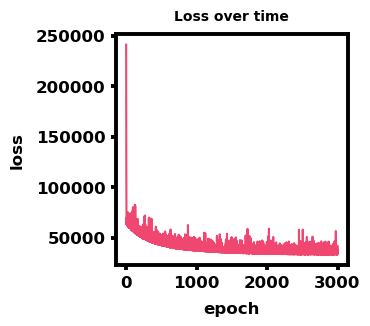

In [542]:
# Plot the loss over time, to see if the model is converging.
f,ax = plt.subplots(figsize=(3,3))
ax.plot(losses)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.set_title('Loss over time')
plt.show()

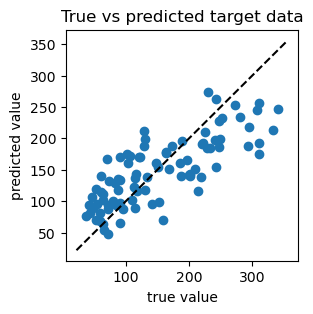

The R^2 score with neural network is 0.589108143899695


In [23]:
# Use the model to predict the target data in the testing set
y_nn = model(XTest).detach().numpy()

# Now, let's plot the true target data and the predicted target data.
f,ax = plt.subplots(figsize=(3,3))
ax.scatter(testTarget, y_nn)
ax.set_xlabel('true value'); ax.set_ylabel('predicted value')
ax.set_title('True vs predicted target data')
#Put a line through the origin with slope 1
ax.plot(ax.get_xlim(), ax.get_xlim(), 'k--')
plt.show()

# Now, let's compute the R^2 score to quantify the fit.
r2 = r2_score(testTarget, y_nn)
print(f'The R^2 score with neural network is {r2}')

In [24]:
# Now, let's try a more complex model, with a couple of hidden layers and activation functions.
input_size = X_biasTrain.shape[1]
hidden_size = [10, 5]
output_size = 1

class ComplexNN(nn.Module):
    def __init__(self):
        super(ComplexNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size[0])
        self.fc2 = nn.Linear(hidden_size[0], hidden_size[1])
        self.fc3 = nn.Linear(hidden_size[1], output_size)
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
# This model consists of three fully connected layers, with 20, 10, and 1 neurons, respectively.
# The first two layers use the ReLU activation function, while the last layer does not use any activation function.
# See if you can figure out where these numbers are specified in the code above.
    
# Create the model, loss function, and optimizer
model = ComplexNN()
criterion = nn.MSELoss()
# Choose the optimizer and learning rate.  
# Here we will use the stochastic gradient descent (SGD) optimizer.
optimizer = optim.SGD(model.parameters(), lr=0.0001)


What the heck is a ReLu? Here is where neural networks become interesting: Nonlinear activation functions!

The concept for these is rooted in the function of neurons (hence the name neural network). Each fully connected node and its current value is fed to an "activation function" which determines, nonlinearly, if the node "fired" in the neural network. This output of which nodes fired is then the next input daisy chained to more linear layers.

![alt_text](Figures/activations.PNG)

In [25]:
# Train the model, using the training data
epochs = 1000
losses = []
for epoch in tqdm(range(epochs)):
    running_loss = 0.0
    for i, data in enumerate(trainLoader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    losses.append(running_loss)
    # Print the loss every 100 epochs, to see how the training is going.
    # Delete the output of the print statement each time you run this, to keep the output clean.
    if epoch % 100 == 0:
        print(f'Epoch {epoch+1}, loss: {running_loss:.2f}\r')
        
# As you run this, you should see the loss decrease over time.
# Run it multiple times to see how the loss changes.
# Try different learning rates and numbers of epochs to see how the loss changes.
# Try different numbers of hidden layers and neurons to see how the loss changes.

  0%|          | 3/1000 [00:00<00:42, 23.40it/s]

Epoch 1, loss: 329852.29


 10%|█         | 104/1000 [00:03<00:30, 29.84it/s]

Epoch 101, loss: 65649.88


 20%|██        | 204/1000 [00:06<00:31, 25.32it/s]

Epoch 201, loss: 36160.47


 31%|███       | 310/1000 [00:09<00:12, 55.25it/s]

Epoch 301, loss: 44991.52


 41%|████      | 411/1000 [00:11<00:10, 57.47it/s]

Epoch 401, loss: 35129.08


 51%|█████     | 512/1000 [00:12<00:08, 57.06it/s]

Epoch 501, loss: 39889.68


 61%|██████    | 609/1000 [00:14<00:06, 57.88it/s]

Epoch 601, loss: 33308.46


 70%|███████   | 704/1000 [00:16<00:06, 43.85it/s]

Epoch 701, loss: 37949.51


 81%|████████  | 806/1000 [00:19<00:05, 37.35it/s]

Epoch 801, loss: 36849.27


 90%|█████████ | 904/1000 [00:22<00:03, 31.96it/s]

Epoch 901, loss: 33306.27


100%|██████████| 1000/1000 [00:25<00:00, 39.96it/s]


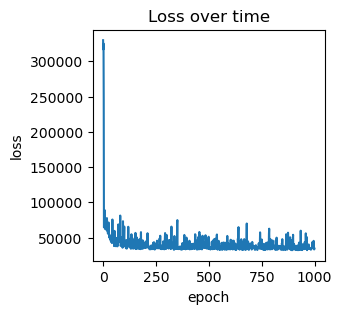

In [26]:
# Plot the loss over time, to see if the model is converging.
f,ax = plt.subplots(figsize=(3,3))
ax.plot(losses)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.set_title('Loss over time')
plt.show()

In [ ]:
# Use the model to predict the target data in the testing set
y_nn = model(XTest).detach().numpy()

# Now, let's plot the true target data and the predicted target data.
f,ax = plt.subplots(figsize=(3,3))
ax.scatter(testTarget, y_nn)
ax.set_xlabel('true value'); ax.set_ylabel('predicted value')
ax.set_title('True vs predicted target data')
#Put a line through the origin with slope 1
ax.plot(ax.get_xlim(), ax.get_xlim(), 'k--')
plt.show()

# Now, let's compute the R^2 score to quantify the fit.
r2 = r2_score(testTarget, y_nn)
print(f'The R^2 score with neural network is {r2}')

## (5) CNN example in PyTorch


![alt text](Figures/cnn.PNG)

Time permitting, let's play around with an example CNN or Convolutional Neural Network. This ties in nicely with our image processing discussions earlier this week as well as gives us an example of using machine learning to do **feature selection**. Instead of manually deciding features, we can have the all powerful machine choose which features to learn on instead.

To do this we will download a common toy ML dataset: OxfordFlowers17

Oxford flowers contains photographs scraped from the web of 17 different common flowers to Oxford, England. Each class has 80 examples stored within the dataset.

In [13]:
#UNCOMMENT ME FOR WINDOWS
#!curl -OL https://thor.robots.ox.ac.uk/datasets/flowers-17/17flowers.tgz   

#UNCOMMENT ME FOR MAC/LINUX
#!wget -nc https://thor.robots.ox.ac.uk/datasets/flowers-17/17flowers.tgz

!mkdir flowers17_dataset
!tar xvzf 17flowers.tgz -C ./flowers17_dataset/ 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0 57.4M    0 32484    0     0  41592      0  0:24:09 --:--:--  0:24:09 41592
  5 57.4M    5 3455k    0     0  1956k      0  0:00:30  0:00:01  0:00:29 1956k
 20 57.4M   20 11.6M    0     0  4297k      0  0:00:13  0:00:02  0:00:11 4297k
 33 57.4M   33 18.9M    0     0  5137k      0  0:00:11  0:00:03  0:00:08 5137k
 46 57.4M   46 26.9M    0     0  5784k      0  0:00:10  0:00:04  0:00:06 5784k
 61 57.4M   61 35.4M    0     0  6268k      0  0:00:09  0:00:05  0:00:04 7237k
 77 57.4M   77 44.2M    0     0  6689k      0  0:00:08  0:00:06  0:00:02 8355k
 92 57.4M   92 53.3M    0     0  7035k      0  0:00:08  0:00:07  0:00:01 8550k
100 57.4M  100 57.4M    0     0  7202k      0  0:00:08  0:00:08 --:--:-- 8980k
A subdirectory or file flowers17_dataset already ex

In [31]:
# lets plot some of these flowers and take a look

import os
from IPython.display import Image, display


def display_random_flower():
  data_dir = './datasets/17flowers/jpg/'
  files = os.listdir(data_dir)
  files = [ x for x in files if x[-4:] == '.jpg' ]
  label_names = ['daffodil', 'snowdrop','lily valley', 'bluebell', 'crocus','iris','tiger lily','tulip','fritillary','sunflower','daisy','colts foot','dandelion','cowlisp','buttercup','windflower','pansy']
  total_images = len(files)
  data_labels = np.zeros((total_images))
  for i in range(0,17):
    data_labels[i*80:80+ 80*(i) ] = i  #label all the images
  ind = np.random.randint(total_images)
  image_num = int(files[ind].replace('image_','').replace('.jpg',''))-1
  
  print('i am a %s!'%label_names[int(data_labels[image_num])] )
  
  display(Image( (data_dir + files[ind]) ))


i am a crocus!


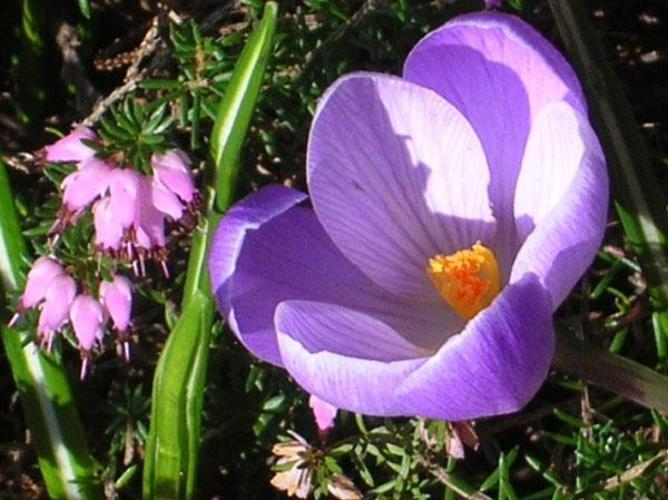

In [32]:
display_random_flower()

We need to process our images to be uniform size, as CNNs (like most NNs) require constant sized inputs to train efficiently. So we will need to crop/pad our images! At the same time we are going to shrink our images a bit, we dont really need that much information / resolution to train a decent CNN.

In [297]:
import tqdm as tq
import PIL
import torch

data_dir = './datasets/17flowers/jpg/'
files = os.listdir(data_dir)
files = [ x for x in files if x[-4:] == '.jpg' ]
label_names = ['daffodil', 'snowdrop','lily valley', 'bluebell', 'crocus','iris','tiger lily','tulip','fritillary','sunflower','daisy','colts foot','dandelion','cowlisp','buttercup','windflower','pansy']
total_images = len(files)

w = 128  #new image size w
h = 128 #new image size h
channels = 3
total_classes = 17
X = np.zeros([total_images, w, h, channels])  #ram intensive
Y = np.zeros([total_images, total_classes])

data_labels = np.zeros((total_images))
for i in range(0,17):
  data_labels[i*80:80+ 80*(i) ] = i  #label all the images

def one_hot(a, num_classes):
  return np.squeeze(np.eye(num_classes)[a.reshape(-1)])

def shrink_pad_square(im, w=512, h=512, new_w=128, new_h=128, fill_color=(0, 0, 0)):
    x, y = im.size
    new_im = PIL.Image.new('RGB', (w, h), fill_color)
    new_im.paste(im, (int((w - x) / 2), int((h - y) / 2)))
    new_im = new_im.resize((new_w, new_h))
    return new_im

def convert_image_to_float(im):
  return np.array(im).astype(float)/255

def preprocess(im,):
    return convert_image_to_float(shrink_pad_square(im))

# lets process all our images (with a progressbar)
labels = []
for i in tq.tqdm(range(len(files))):
  im = PIL.Image.open(data_dir + files[i])
  labels.append(data_labels[i])
  X[i,:,:,:] = preprocess(im)

Y_onehot = one_hot(np.array(labels).astype(int), total_classes)
Y_classes = np.array(labels).astype(int)

print(X.shape)
print(Y.shape)


  0%|          | 0/1360 [00:00<?, ?it/s]

100%|██████████| 1360/1360 [00:20<00:00, 66.04it/s]

(1360, 128, 128, 3)
(1360, 17)


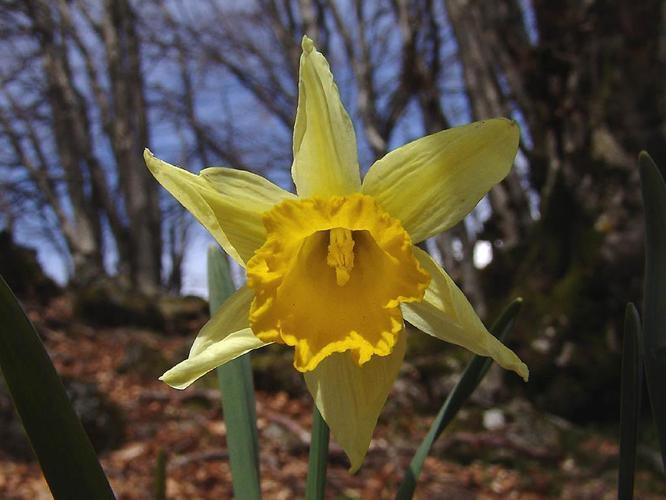

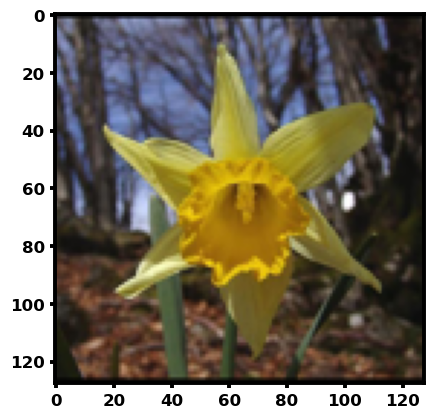

In [543]:
plt.imshow(X[1])
display(Image( (data_dir + files[1]) ))

Now we can define our CNN

In [545]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

total_convolutional_layers = 3 
total_dense_layers = 3
maxpooling = True 
dropout = False 


filter_sizes = "64,32,16" #how many filters for this layer?
kernel_sizes = "3,2,2"    #kernel sizes for the filters?
strides = "3,2,2"          # what to stride for the filter?
pool_sizes = "2,2,1"       # what to pool
dense_neurons = "256,64,32"  #classifier shape


# Setting up our data to train with  pytorch
my_x = X 
my_y = Y_classes

tensor_x = torch.Tensor(np.swapaxes(my_x,-1,1)) # transform to torch tensor
tensor_y = torch.LongTensor(my_y)

my_dataset = TensorDataset(tensor_x,tensor_y) # create your datset
my_dataloader = DataLoader(my_dataset, batch_size=20, shuffle=True) # create your dataloader and define a batch size for training

class CNN2(nn.Module):
    def __init__(self, total_convolutional_layers, total_dense_layers, maxpooling,
                filter_sizes, kernel_sizes, strides, pool_sizes,
                dense_neurons,):
        super().__init__()
        input_list = lambda strinput: [int(x) for x in strinput.split(',')]
        float_list = lambda strinput: [float(x) for x in strinput.split(',')]

        self.convolutional_layers = []
        self.pools = []
        self.dense_layers = []
       

        filter_sizes  = input_list(filter_sizes)
        kernel_sizes  = input_list(kernel_sizes)
        strides  = input_list(strides)
        pool_sizes  = input_list(pool_sizes)
        dense_neurons  = input_list(dense_neurons)

        padding = 0
        dilation = 1

       # flatsize = int((filter_sizes[-1] + 2 * padding - dilation * (kernel_sizes[-1] - 1) - 1) / strides[-1] + 1)
       
        flatsize=14400 #unforunately I couldnt figure this out in time for the presentation, so we are hard coding our flat vector size$

        self.conv1 = nn.Conv2d(3, filter_sizes[0], kernel_sizes[0], )
        self.conv2 = nn.Conv2d(filter_sizes[0], filter_sizes[1], kernel_sizes[1],)
        self.conv3 = nn.Conv2d(filter_sizes[1], filter_sizes[2], kernel_sizes[2],)
        
        self.pool1 = nn.MaxPool2d(pool_sizes[0])
        self.pool2 = nn.MaxPool2d(pool_sizes[1])
        self.pool3 = nn.MaxPool2d(pool_sizes[2])

        self.fc1 = nn.Linear(flatsize, dense_neurons[0], )
        self.fc2 = nn.Linear(dense_neurons[0], dense_neurons[1], )
        self.fc3 = nn.Linear(dense_neurons[1], dense_neurons[2], )
        self.fc4 = nn.Linear(dense_neurons[2], total_classes)


    def forward(self, x):

        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.pool3(F.relu(self.conv3(x)))

        x = torch.flatten(x, 1) # flatten all dimensions except batch

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.softmax(self.fc4(x),dim=1) #SPECIAL FUNCTION!

        return x

    # This function only passes some data through our trained feature selector, so we can plot the features it finds
    def feature_select(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.pool3(F.relu(self.conv3(x)))
        return x


cnn2 = CNN2(total_convolutional_layers, total_dense_layers, maxpooling,
                filter_sizes, kernel_sizes, strides, pool_sizes,
                dense_neurons,)


#finally define our loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn2.parameters(), lr=0.001,)

In [546]:
# TRAIN THE MODEL! If this is running on your CPU, it may take up to 30 minutes for 100 epochs, consider lowering the epoch number.
import tqdm as tqdm
        
for epoch in range(150):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(my_dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = cnn2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    losses.append(running_loss)

    if epoch % 10 == 0:    # print every 10 epochs mini-batches
        print(f'Epoch {epoch+1}, loss: {running_loss:.2f}\r')
        

correct = 0
total = 0

#calculate the accuracy across the entire dataset.
with torch.no_grad():
    for data in my_dataloader:
        images, labels = data
        outputs = cnn2(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the {len(X)} test images: {100 * correct // total} %')


Epoch 1, loss: 190.88
Epoch 11, loss: 172.40
Epoch 21, loss: 166.72
Epoch 31, loss: 167.86
Epoch 41, loss: 162.29


Text(0, 0.5, 'Cross Entropy Loss')

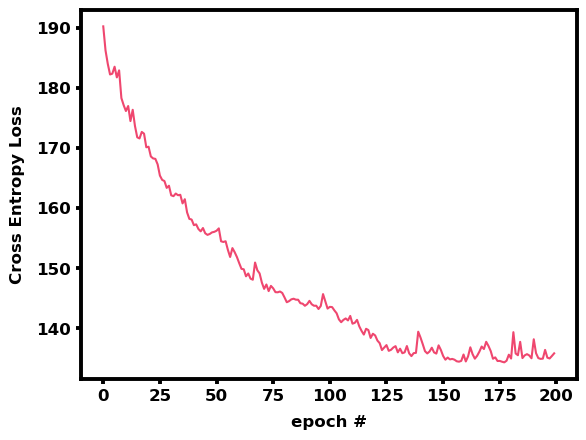

In [516]:
plt.plot(losses)
plt.xlabel('epoch #')
plt.ylabel('Cross Entropy Loss')

In [526]:
torch.save(cnn2, './example_cnn_uqbio.pt') #just incase i accidently delete the model, it takes 2 hours to train on a CPU!


#cnn2 = torch.load('./example_cnn_uqbio.pt')
#cnn2.eval()

I made a grevious Machine learning error here, can anyone in the class tell me what I did wrong for this problem?



## Training, Validation and Testing

![alt text](FiguresD/image14C.png)

CNN: bluebell
Real label: iris
Probabilities
daffodil    	0.000%
snowdrop    	0.000%
lily valley    	0.000%
bluebell    	100.000%
crocus    	0.000%
iris    	0.000%
tiger lily    	0.000%
tulip    	0.000%
fritillary    	0.000%
sunflower    	0.000%
daisy    	0.000%
colts foot    	0.000%
dandelion    	0.000%
cowlisp    	0.000%
buttercup    	0.000%
windflower    	0.000%
pansy    	0.000%


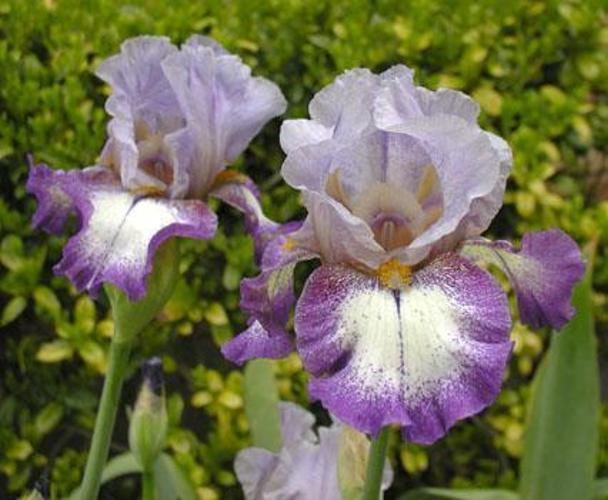

In [527]:
i = np.random.randint(len(X))


x = torch.Tensor(np.array([np.swapaxes(X[i],-1,0)]))

outputs  = cnn2(torch.Tensor(np.array([np.swapaxes(X[i],-1,0)])))

print('CNN: ' + label_names[int(outputs.max(1)[1])])
print('Real label: ' + label_names[Y_classes[i]])

print('======================')
print('Probabilities')
print('======================')
[print(label_names[i] + '    ' + '\t' + f'{float(outputs[0][i])*100:.3f}' + '%')for i in range(len(label_names))]
x=1
display(Image( (data_dir + files[i]) ))

So, how did we do?  how can we quantify how well we did?

![alt text](FiguresD/image15.png)

![confusion matrix](./figures/conf_mat.png)

In [ ]:
outputs  = cnn2(torch.Tensor(np.swapaxes(X,-1,1)))
y_pred = [int(x) for x in outputs.max(1)[1]]
y_true = Y_classes
labels = [label_names[i] for i in Y_classes]

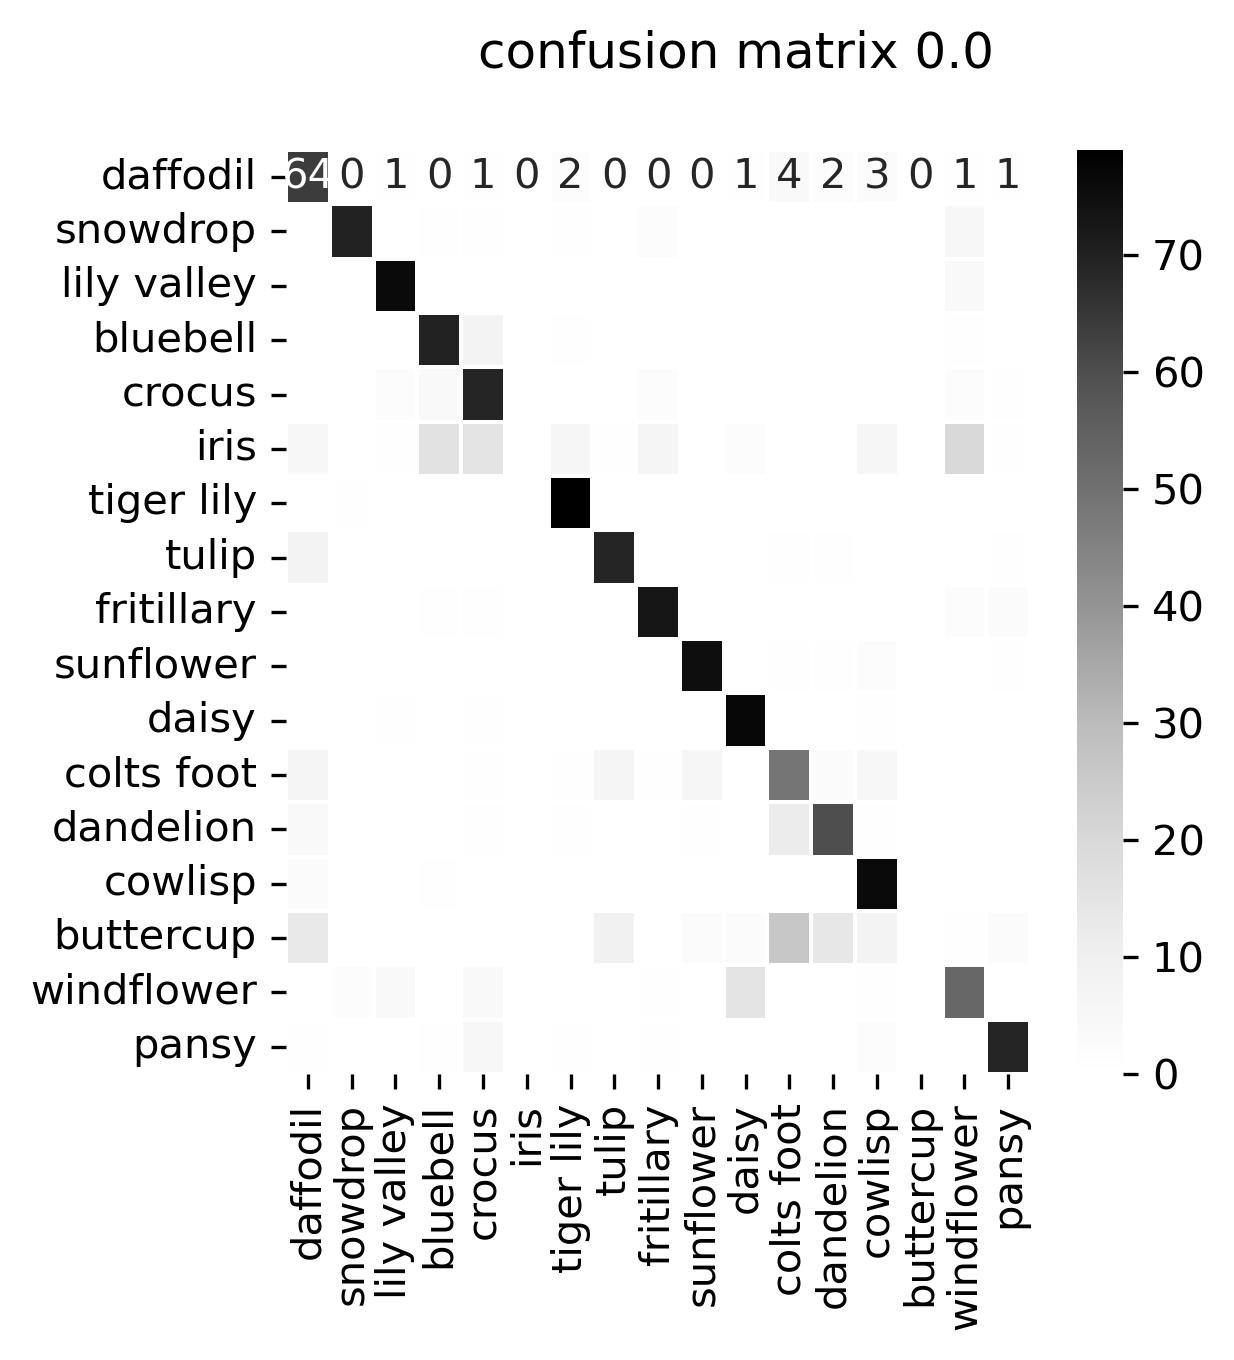

In [482]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn 
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
fig, ax = plt.subplots(figsize=(4,4), dpi=300)         
fig.suptitle("confusion matrix %s"%label)
categories = label_names
f = seaborn.heatmap(cm, annot=True, linewidths=.5, ax=ax, xticklabels=categories, yticklabels=categories, cmap='Greys')


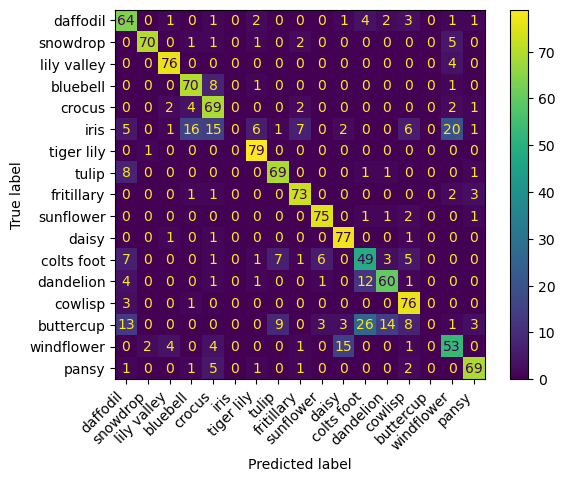

In [502]:

ConfusionMatrixDisplay(cm, display_labels=label_names,).plot()
ax = plt.gca()
ax.set_xticks([x for x in range(len(label_names))], label_names, rotation=45, ha='right') #manually fix the labels sigh


We can also take a look at the outputs of actual filtering done by our trained CNN, the "feature selection" that it performed.


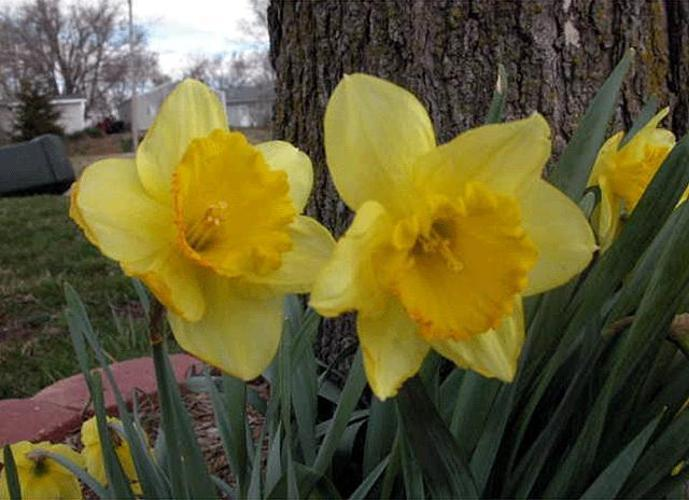

torch.Size([1, 16, 30, 30])


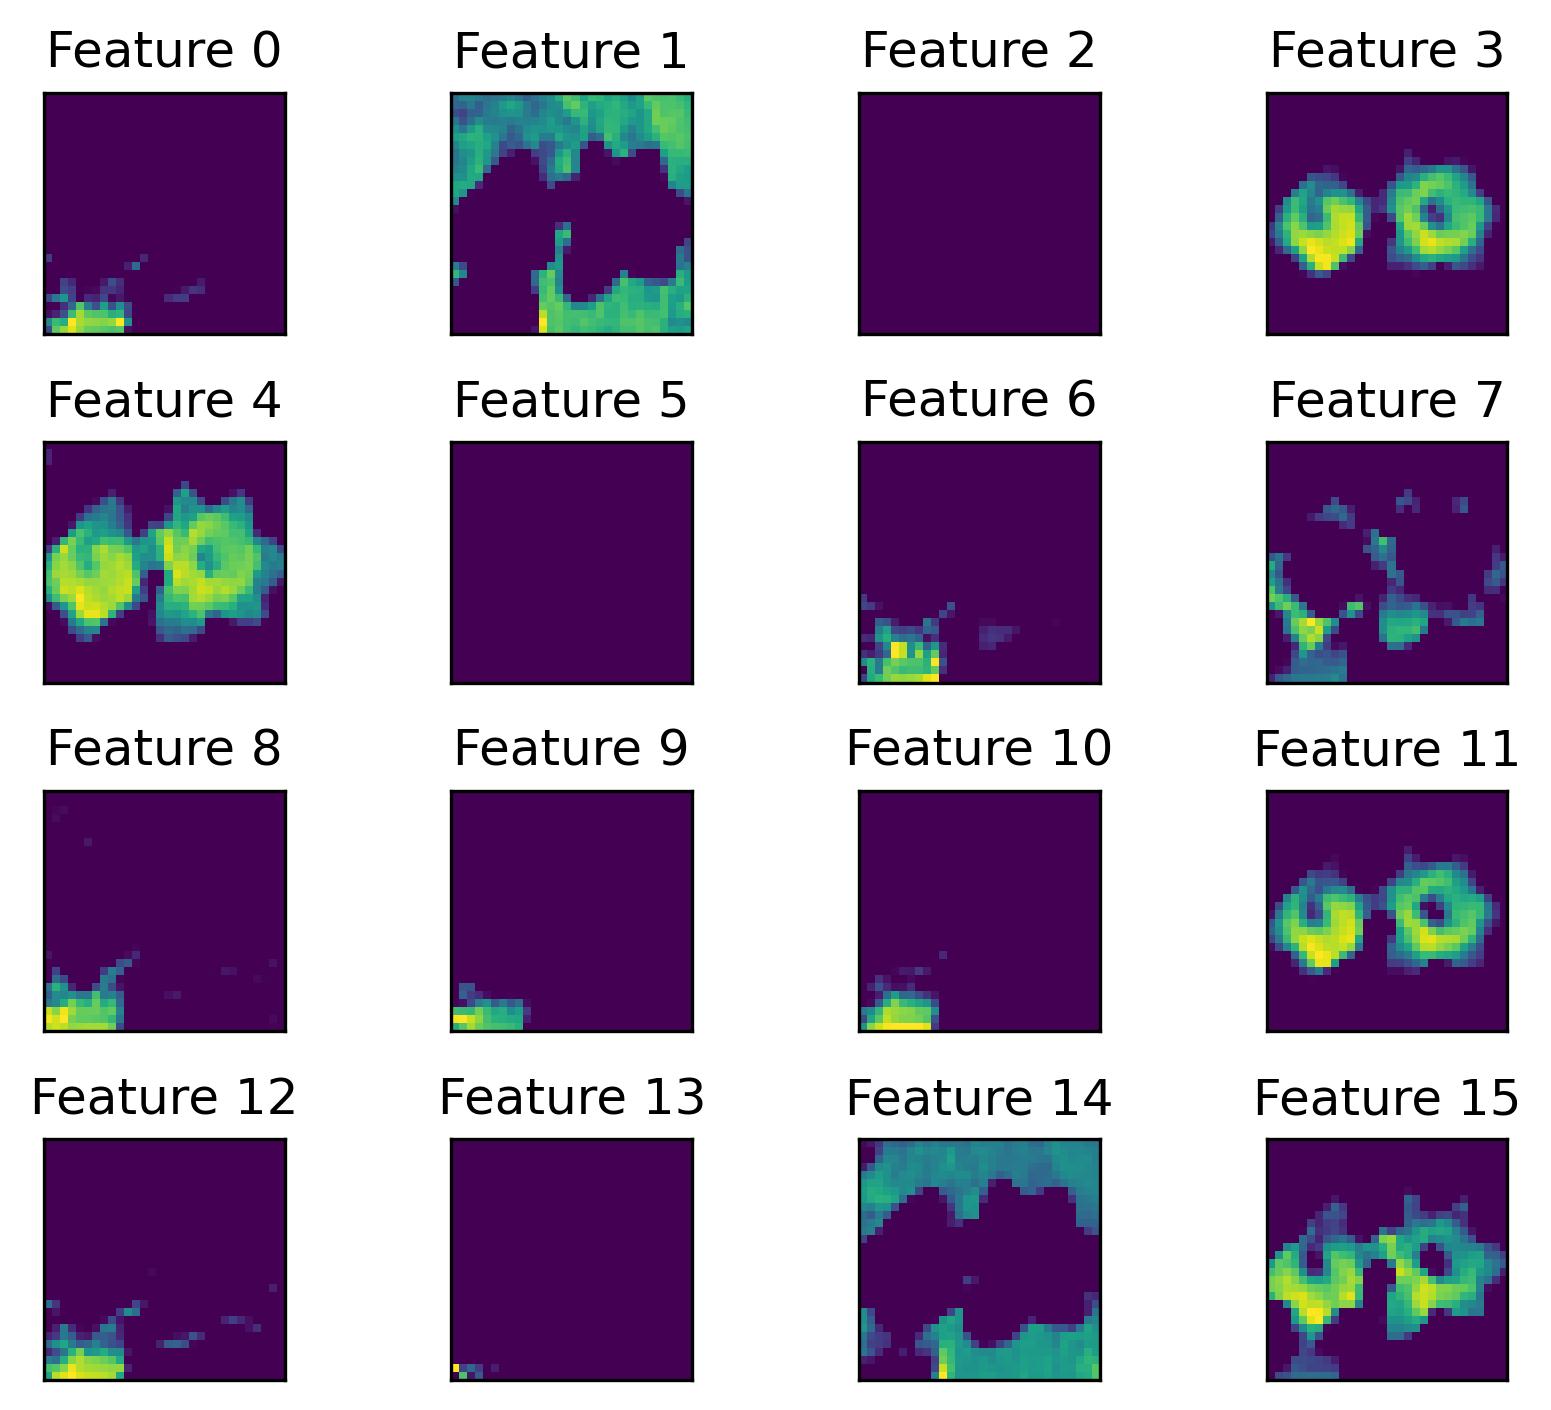

In [447]:
i = 0#np.random.randint(len(X))

x = torch.Tensor(np.array([np.swapaxes(X[i],-1,0)]))

outputs  = cnn2.feature_select(torch.Tensor(np.array([np.swapaxes(X[i],-1,0)])))

display(Image( (data_dir + files[i]) ))
print(outputs.shape)
f,ax = plt.subplots(4,4,tight_layout=True, dpi=300)
k = 0
for i in range(4):
    for j in range(4):
        ax[i,j].imshow(np.rot90(outputs[0,k,:,:].detach().numpy(),))
        ax[i,j].set_title('Feature %i'%k)
        ax[i,j].get_xaxis().set_visible(False)
        ax[i,j].get_yaxis().set_visible(False)
        k+=1



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


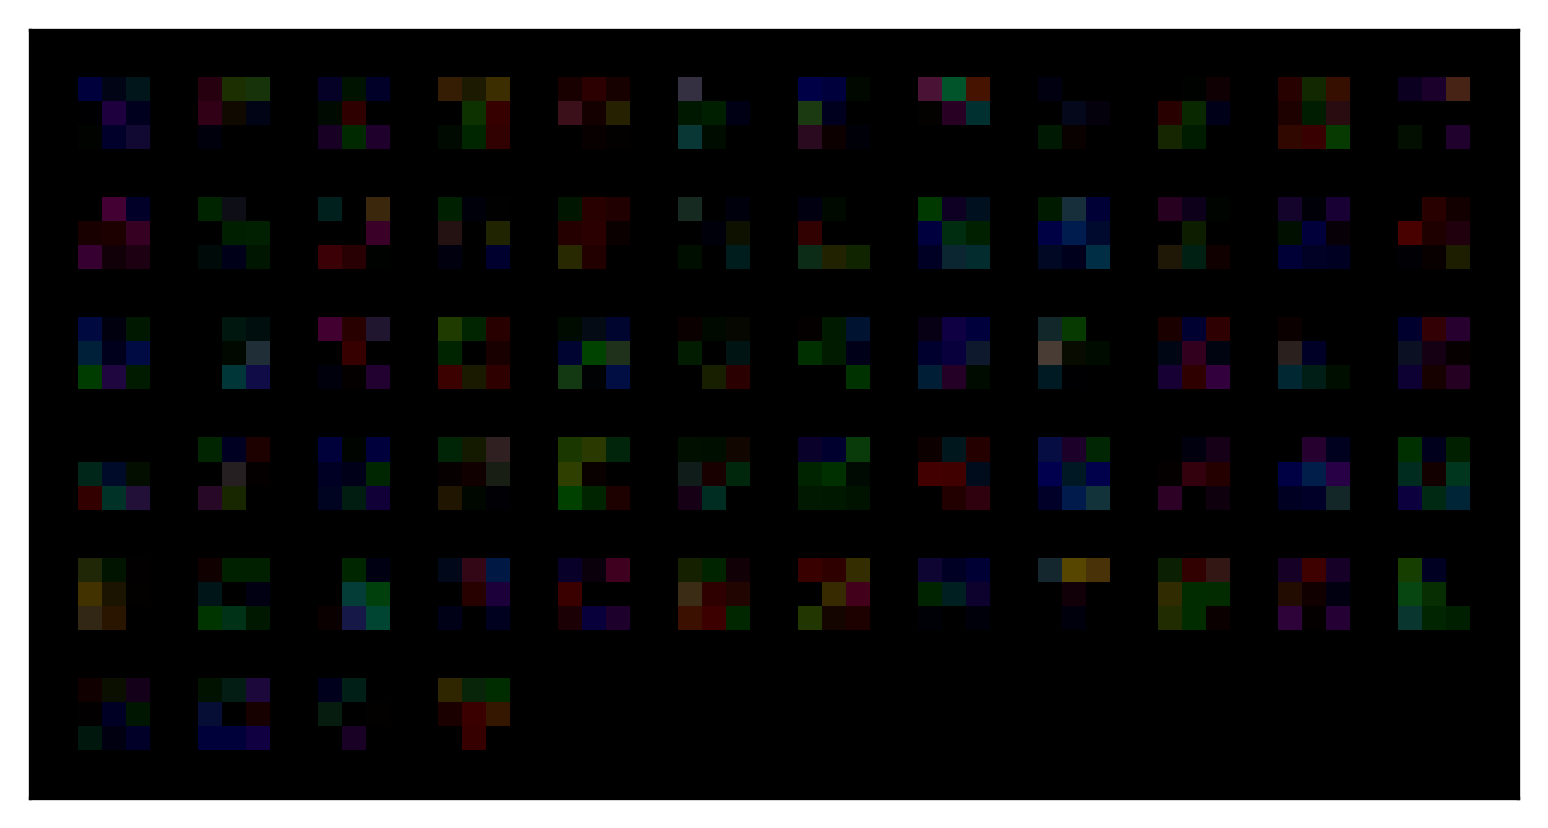

In [449]:
kernels = cnn2.conv1.weight.detach().clone()
filter_img = torchvision.utils.make_grid(kernels, nrow = 12)
plt.figure(dpi=300)
plt.imshow(filter_img.permute(1, 2, 0))
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

Neat! These are the 3x3 kernels that slide across our images first.

## (6) A quick unsupervised learning exercise on the board if we have time!

Let's try to work out an algorithm for clustering some 2D points.

## (7) Ethical Condsiderations when using ML

As we have seen, Machine Learning algorithms are **general** purpose mathmatical tools. It is arbitrary what data is used to fit any target. This means that machine learning is often used for reasons ranging from questionable to outright illegal. As computational scientists, it's imperative to be aware of the capabilities *and* abuses of the tools we use for our scientific goals. 


Below are some examples of real machine learning solutions ranging from acceptable to immoral that we can discuss.


![unethical_ML](./figures/unethical_ML.png)

Sources for the unethical examples:
<details>



Unionization Supression:
https://www.theverge.com/2020/4/20/21228324/amazon-whole-foods-unionization-heat-map-union

Hiring bias:
https://www.reuters.com/article/idUSKCN1MK0AG/

Recidivism:
https://www.propublica.org/article/how-we-analyzed-the-compas-recidivism-algorithm

</details>

Better and better image generators become publically available every year -- meaning an increase in falsified images or even data. Western blots have had a long history of photoshop manipulation that makes it into real academic publications. With image generators, faking data has never been easier. 

Question for the class: What are some of the ethical considerations of freely available image generation? what are some of the pros?

![Fake_western_blot](./figures/Fake_western_blot.png)

Machine learning models are dependent on their data and are only capable of extrapolating, interpreting, or recreating their training data -- in other words how can machine learning can't use anything it hasn't seen. 

#### **Reinforcement of Socioeconomic Trends**
 
Implementations of models for applications such as credit lines, recidivism rates, or hiring practices are especially prone to bias. In a biased society, datasets are prone to contain that inherent bias even with careful filtering! If that bias is present in the data, resulting models can recreate that bias with the added "benefit" of laundering responsibility through a perceived impartial third party actor.
 
Relying on biased models can serve to chill any social mobility and societal progress and mask discriminatory practices from public scrutiny for longer than if the bias was human derived and implemented. This effect is especially prevalent if a model is not constantly retrained on the most current data. Any given model learning on historical snapshot data and is out of date, yet can still be relied on for important, life-altering decisions concerning things such as housing, incarceration, or employment.
 
 
Additionally, access to these models may be limited to those nations, persons, or entities wealthy enough to utilize, train, and compute these larger models. For example, consider a machine learning suite focused on providing accurate market trading predictions that is also paywalled. Those already 1. wealthy enough to market trade, and 2. paid for the subscription are now privy and able to accrue more wealth than those starting from a lower capital amount, increasing the "activation energy" of economic mobility within that particular market.
 
----
 
Case study: [COMPRAS](https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing),  an algorithm designed to predict risk of reoffending of a given incarcerated person, was systemically biased towards people of color and inaccurate in its predictions, and was heavily relied upon by judges in sentencing.
 
|  COMPRAS Prediction and True outcome    | White |  African American|
| ----------- | ----------- | ---- |
| Labeled High Risk, but did not re-offend      | 23.5%       | 44.9% | 
| Labeled Low Risk, but did re-offend   | 47.7%        | 28.0%   | 

![compras](./figures/compras.png)


Machine learning algorithms exist in a human context -- they do not appear out of the ether.

![chatgpt_ethics](Figures/chatgpt2.PNG)

-------


Further Reading
<details>
  <summary>Click to Expand</summary>


----------------------------

Academic Papers:

* [Ethical principles in machine learning and artificial intelligence: cases from the field and possible ways forward](https://www.nature.com/articles/s41599-020-0501-9) - Overview and introduction to ML ethics with 2 case studies - Piano S. (Nature 2020)

* [The global landscape of AI ethics guidelines](https://www.nature.com/articles/s42256-019-0088-2) - Jobin et al. (Nature Machine Intelligence 2019) - Scoping review about the state of AI ethics.


* [The Ethics of AI Ethics: An Evaluation of Guidelines](https://link.springer.com/article/10.1007/s11023-020-09517-8) - Hagendorff (Minds and Machines 2020) - Article and systemic review about areas lacking in recent AI industry guidelines.

Academic Papers w/ focus on Medicinal practice:

* [Implementing Machine Learning in Health Care — Addressing Ethical Challenges](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5962261/) - Char et al. (The New England Journal of Medicine 2019)

* [On the ethics of algorithmic decision-making in healthcare](https://jme.bmj.com/content/46/3/205) - Grote et al (Journal of Medical Ethics 2019) 

Industry White Papers:

* [How to Prevent Discriminatory Outcomes in Machine Learning](https://www3.weforum.org/docs/WEF_40065_White_Paper_How_to_Prevent_Discriminatory_Outcomes_in_Machine_Learning.pdf) - World Economic Forum white paper (2019)

* [The Malicious Use of Artificial Intelligence: Forcasting, Prevention, and Mitigation](https://arxiv.org/ftp/arxiv/papers/1802/1802.07228.pdf) - Future of Humanity Institute (2018)

</details>